Ściągnij plik 'diabetes.csv' z https://www.kaggle.com/datasets/whenamancodes/predict-diabities?resource=download

Następnie przenieś go do swojego folderu Google Colab. Poniższe linie kodu służą do połączenia z Twoim dyskiem Google w celu odnalezienia pliku z danymi.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

In [3]:
diabetes_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/diabetes.csv')

In [4]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Drzewa decyzyjne najlepiej działają dla zbalansowanego zbioru. Sprawdźmy zatem, czy zbiór jest zbalansowany:

In [5]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
# Tworzenie zbioru cech X bez kolumny 'Outcome'
cols = set(diabetes_data.columns)
cols.remove('Outcome')
cols = list(cols)
X = diabetes_data[cols]

# Wyodrębnienie etykiet do klasyfikacji
y = diabetes_data['Outcome']

# Zbiór testowy i treningowy:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
from collections import Counter

print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 360, 1: 177})
Testing target statistics: Counter({0: 140, 1: 91})


# 1. Zadanie (1 pkt)

- a. Zbalansuj zbiór nadpróbkowując mniej liczną klasę.
- b. Zbalansuj zbiór podpróbkowując liczniejszą klasę.



In [8]:
# 1a
# Twój kod ...

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='all',random_state = 0)
X_train_res_over, y_train_res_over = sm.fit_resample(X_train, y_train.ravel())
# X_test_res_over, y_test_res_over = sm.fit_resample(X_test, y_test.ravel())

In [9]:
# 1b
# Twój kod ...

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='all',random_state = 0)
X_train_res_under, y_train_res_under = rus.fit_resample(X_train, y_train.ravel())
# X_test_res_under, y_test_res_under = rus.fit_resample(X_test, y_test.ravel())

In [10]:
# Sprawdzamy, czy zbiór jest zbalansowany po wykonanej operacji:
# Twój kod ...

from collections import Counter

# print(f"Test target statistics: {Counter(y_test_res_over)}")
print(f"Training target statistics: {Counter(y_train_res_over)}")
# print(f"Test target statistics: {Counter(y_test_res_under)}")
print(f"Training target statistics: {Counter(y_train_res_under)}")



Training target statistics: Counter({0: 360, 1: 360})
Training target statistics: Counter({0: 177, 1: 177})


# 2. Zadanie (3 pkt)

Stwórz dwa klasyfikatory typu Drzewo decyzyjne. Skorzystaj z biblioteki scikit-learn. Jeden klasyfikator wytrenuj na niezbalansowanym zbiorze, a drugi na zbalansowanym. Porównaj wyniki.

In [11]:
from sklearn import tree

# trening na danych oryginalnych
# Twój kod ...
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)


# trening na danych zbalansowanych
# Twój kod ...
clf_balanced = tree.DecisionTreeClassifier()
clf_balanced.fit(X_train_res_over, y_train_res_over)

DecisionTreeClassifier()

In [12]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def print_scores(clf, X_test, y_test, header="Dataset statistics:"):
  y_pred = clf.predict(X_test)
  print('-------')
  print(header)
  print('\n')
  print('Precision score %s' % precision_score(y_test, y_pred))
  print('Recall score %s' % recall_score(y_test, y_pred))
  print('F1-score score %s' % f1_score(y_test, y_pred))
  print('Accuracy score %s' % accuracy_score(y_test, y_pred))
  
# Porównanie wyników:

print_scores(clf, X_test, y_test, "Unbalanced set: ")
print_scores(clf_balanced, X_test, y_test, "Balanced set: ")

# --- Twój kod
# --- Twój kod

-------
Unbalanced set: 


Precision score 0.6153846153846154
Recall score 0.5274725274725275
F1-score score 0.5680473372781065
Accuracy score 0.683982683982684
-------
Balanced set: 


Precision score 0.6172839506172839
Recall score 0.5494505494505495
F1-score score 0.5813953488372093
Accuracy score 0.6883116883116883


# 3. Zadanie (1 pkt)

Wyrysuj stworzone drzewo decyzyjne. Czy uważasz, że wybrana przez algorytm struktura jest optymalna? Czy daje dobre wyniki?

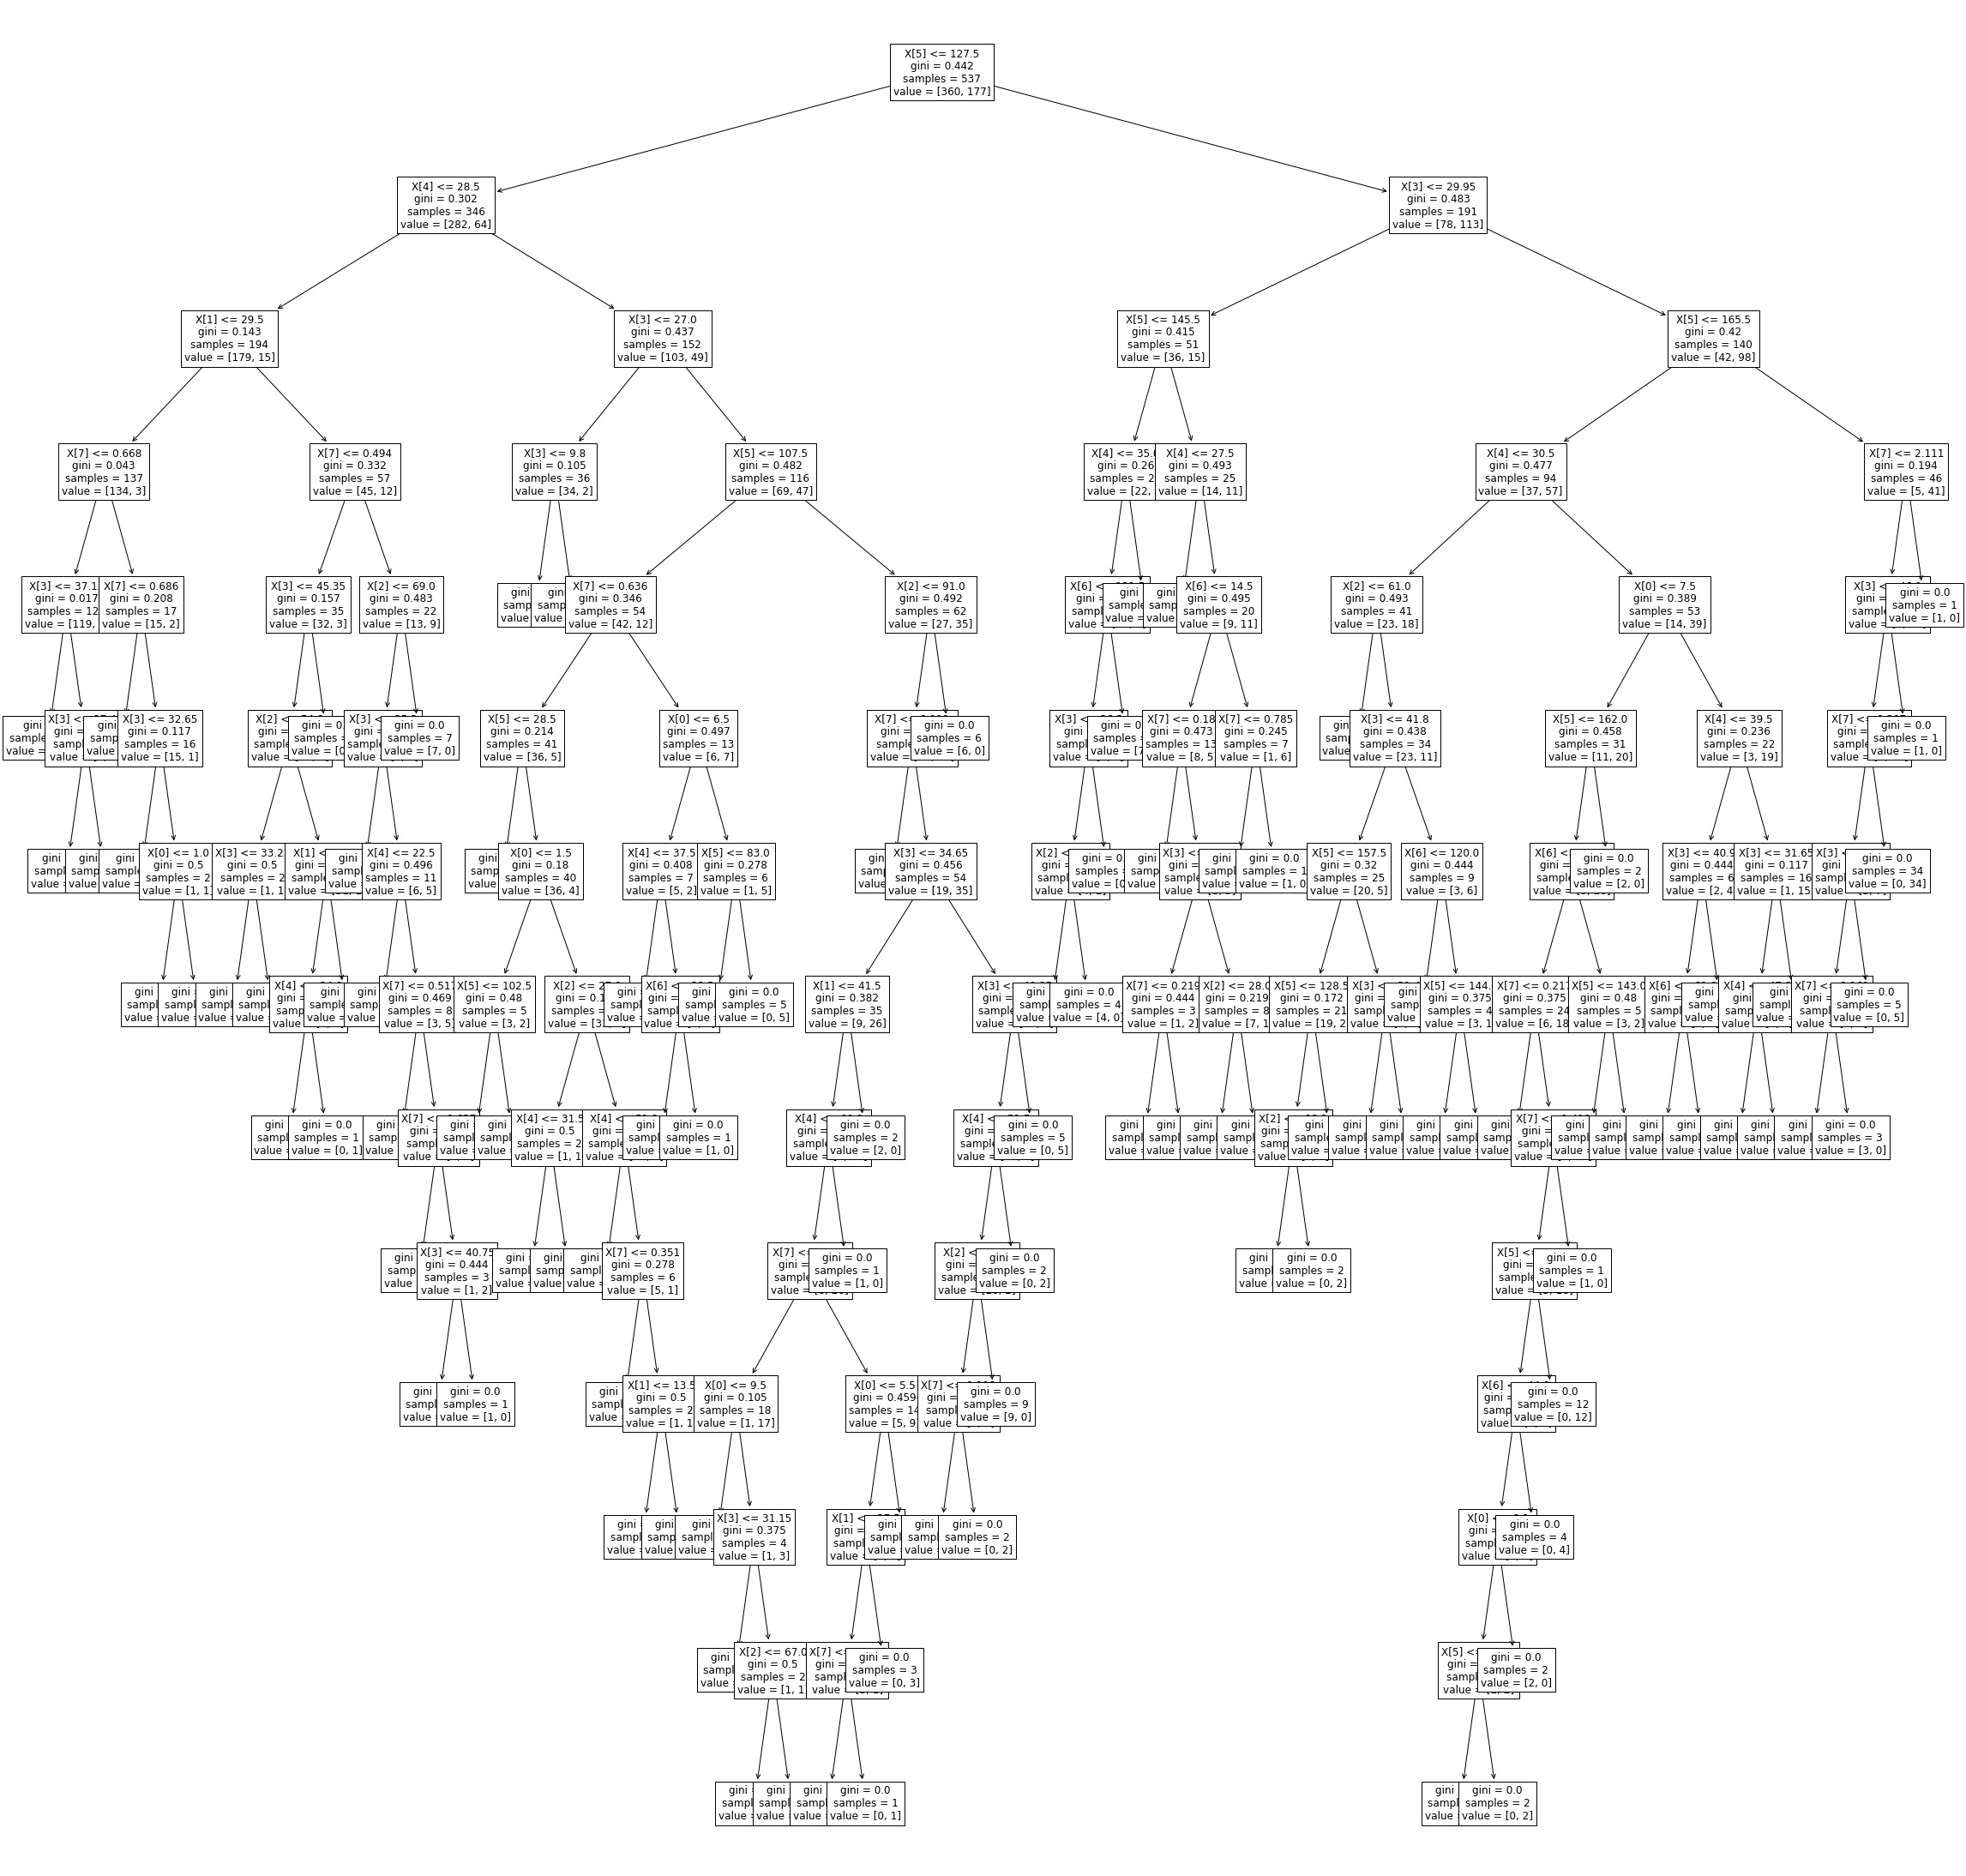

In [13]:
from matplotlib import pyplot as plt

# Wyrysuj drzewo
# --- Twój kod

plt.figure(figsize=(40,40))
tree.plot_tree(clf, fontsize=12)
plt.show()

# 4. Zadanie (2 pkt)

Jakie znasz metody na optymalizację struktury drzewa? Czemu pozwalają zapobiec?
Wypisz tutaj te metody, a następnie wdróż je trenując nowy klasyfikator.

Dokumentacja - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
<br>Metody optymalizacji struktury drzewa:
1. Max Depth
2. Min Samples Split
3. Min Samples Leaf
4. MAX Features
5. MAX Leaf Node
6. MIN Impurity Decrease
7. CCP Alpha

...

Max depth = 4
-------
Dataset statistics:


Precision score 0.6923076923076923
Recall score 0.8901098901098901
F1-score score 0.7788461538461537
Accuracy score 0.8008658008658008


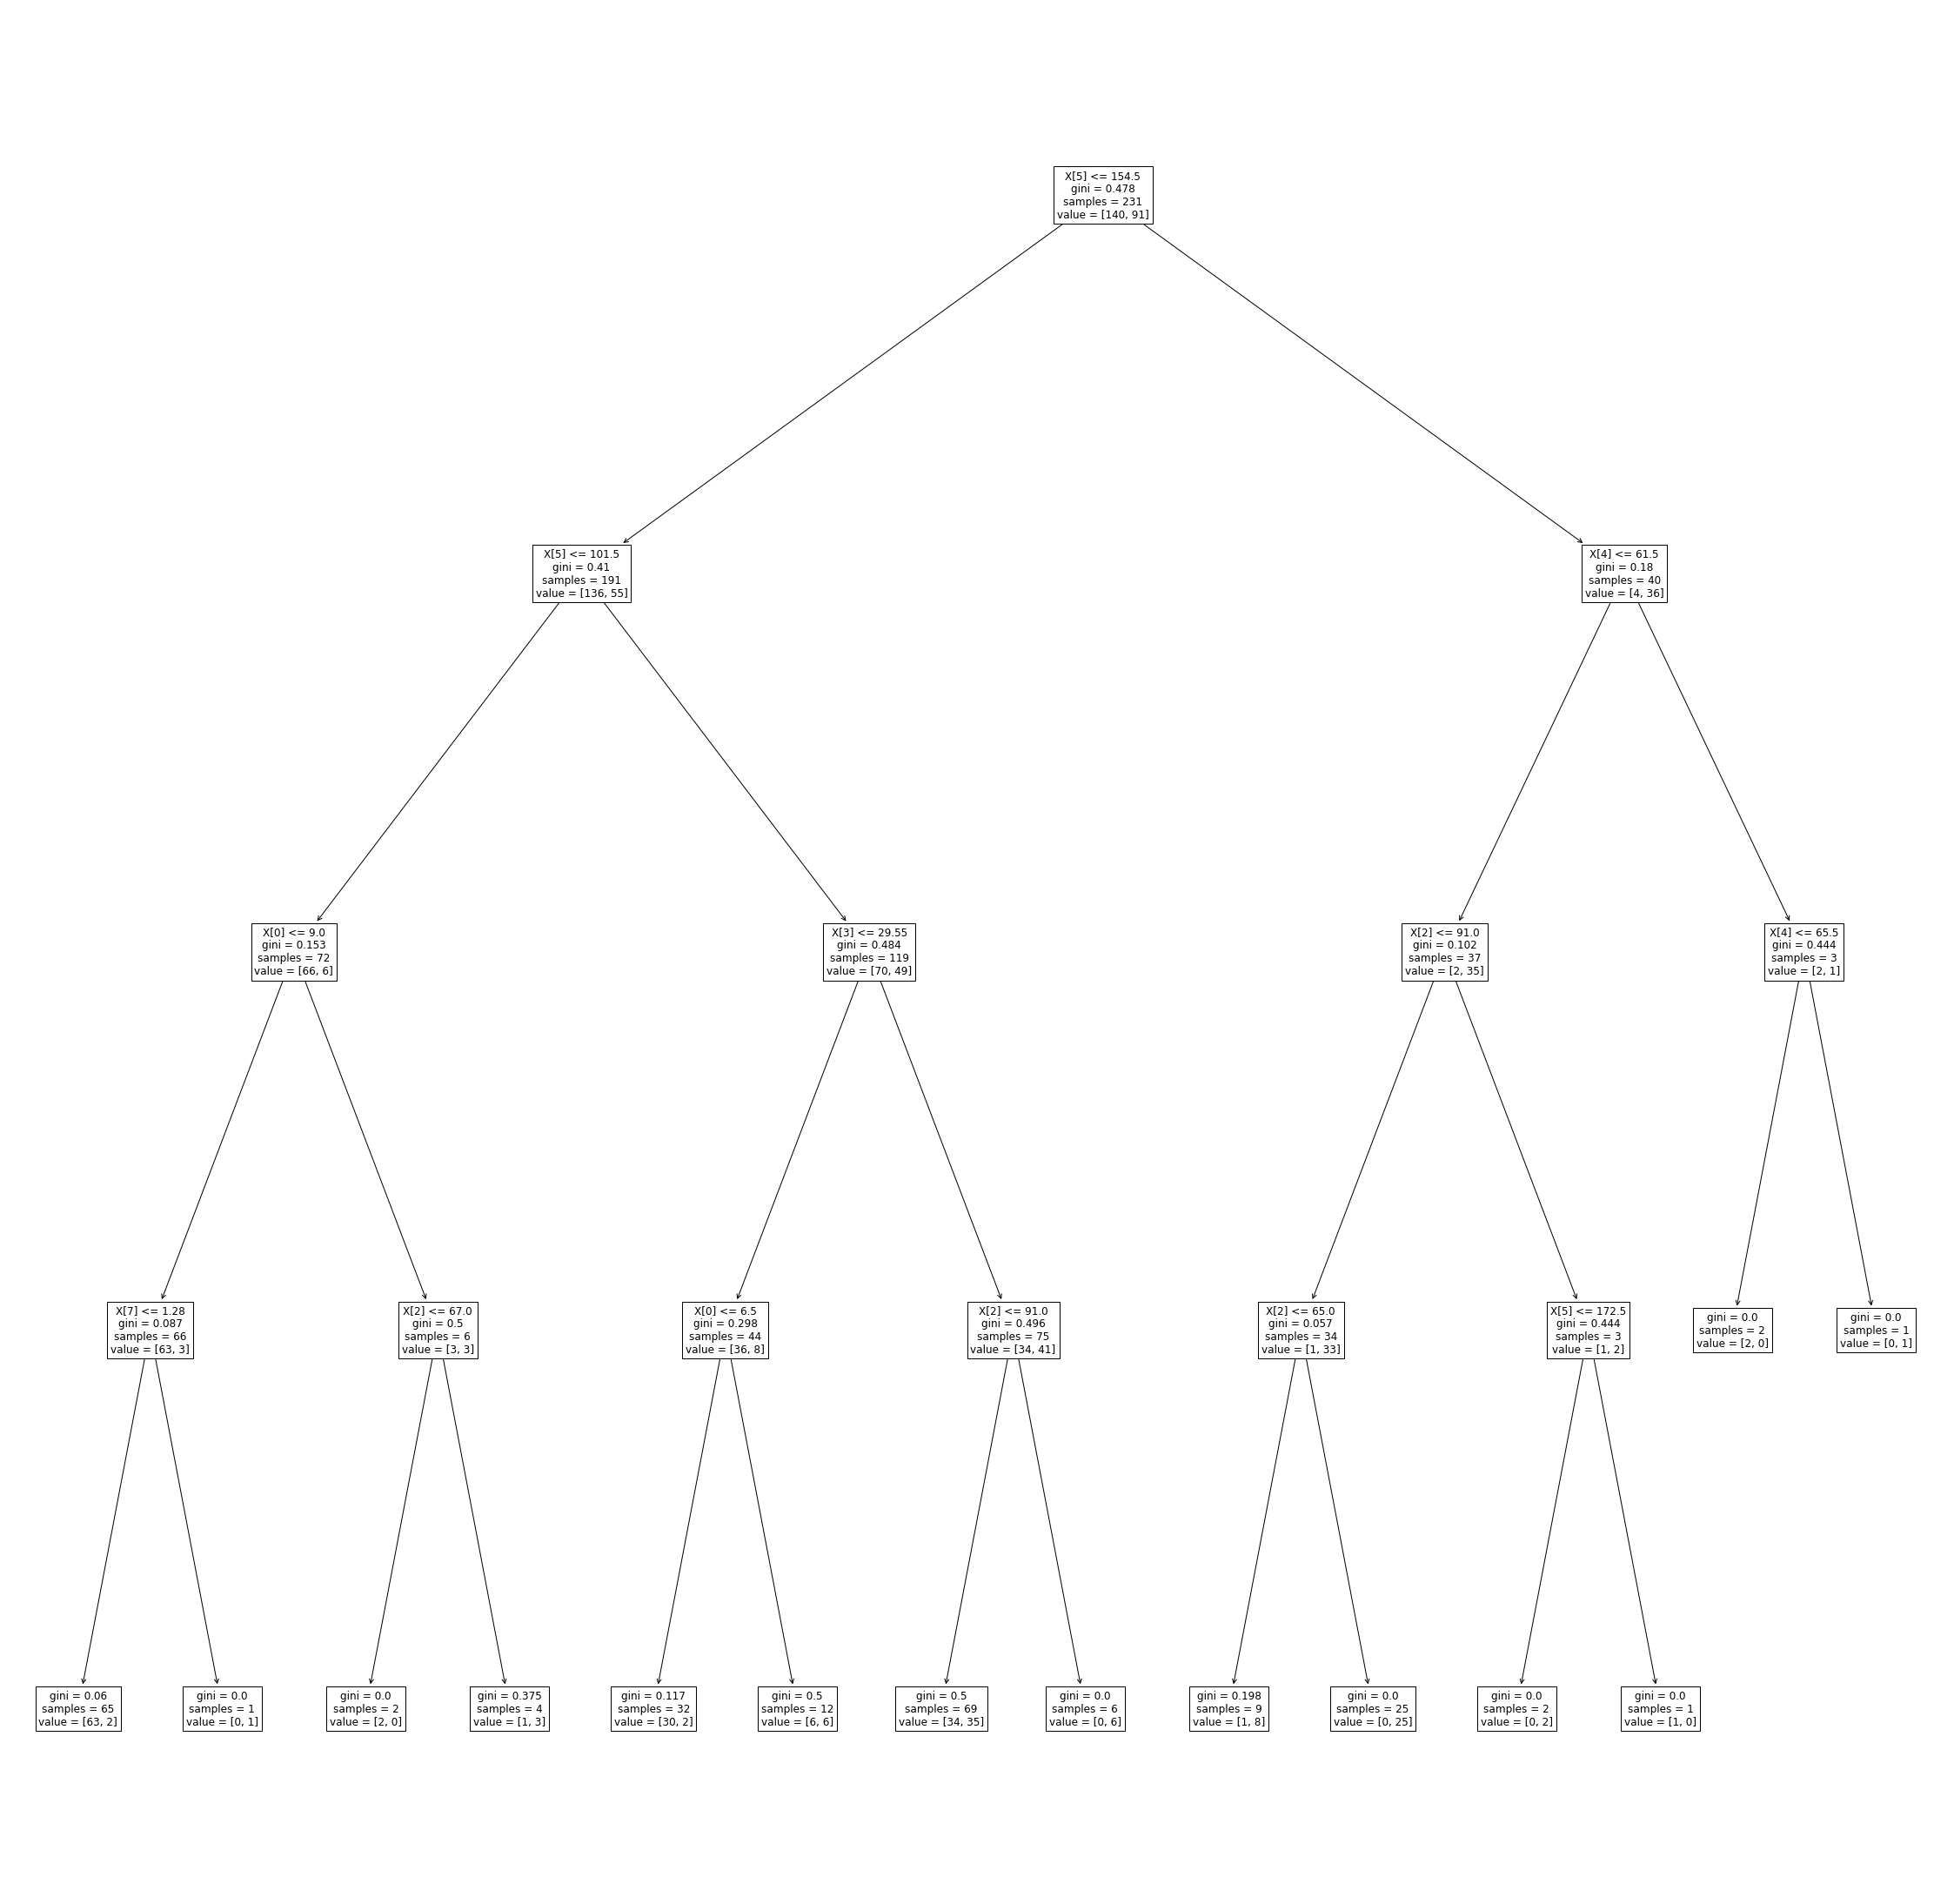


Min Samples Split = 10
-------
Dataset statistics:


Precision score 0.9382716049382716
Recall score 0.8351648351648352
F1-score score 0.8837209302325583
Accuracy score 0.9134199134199135


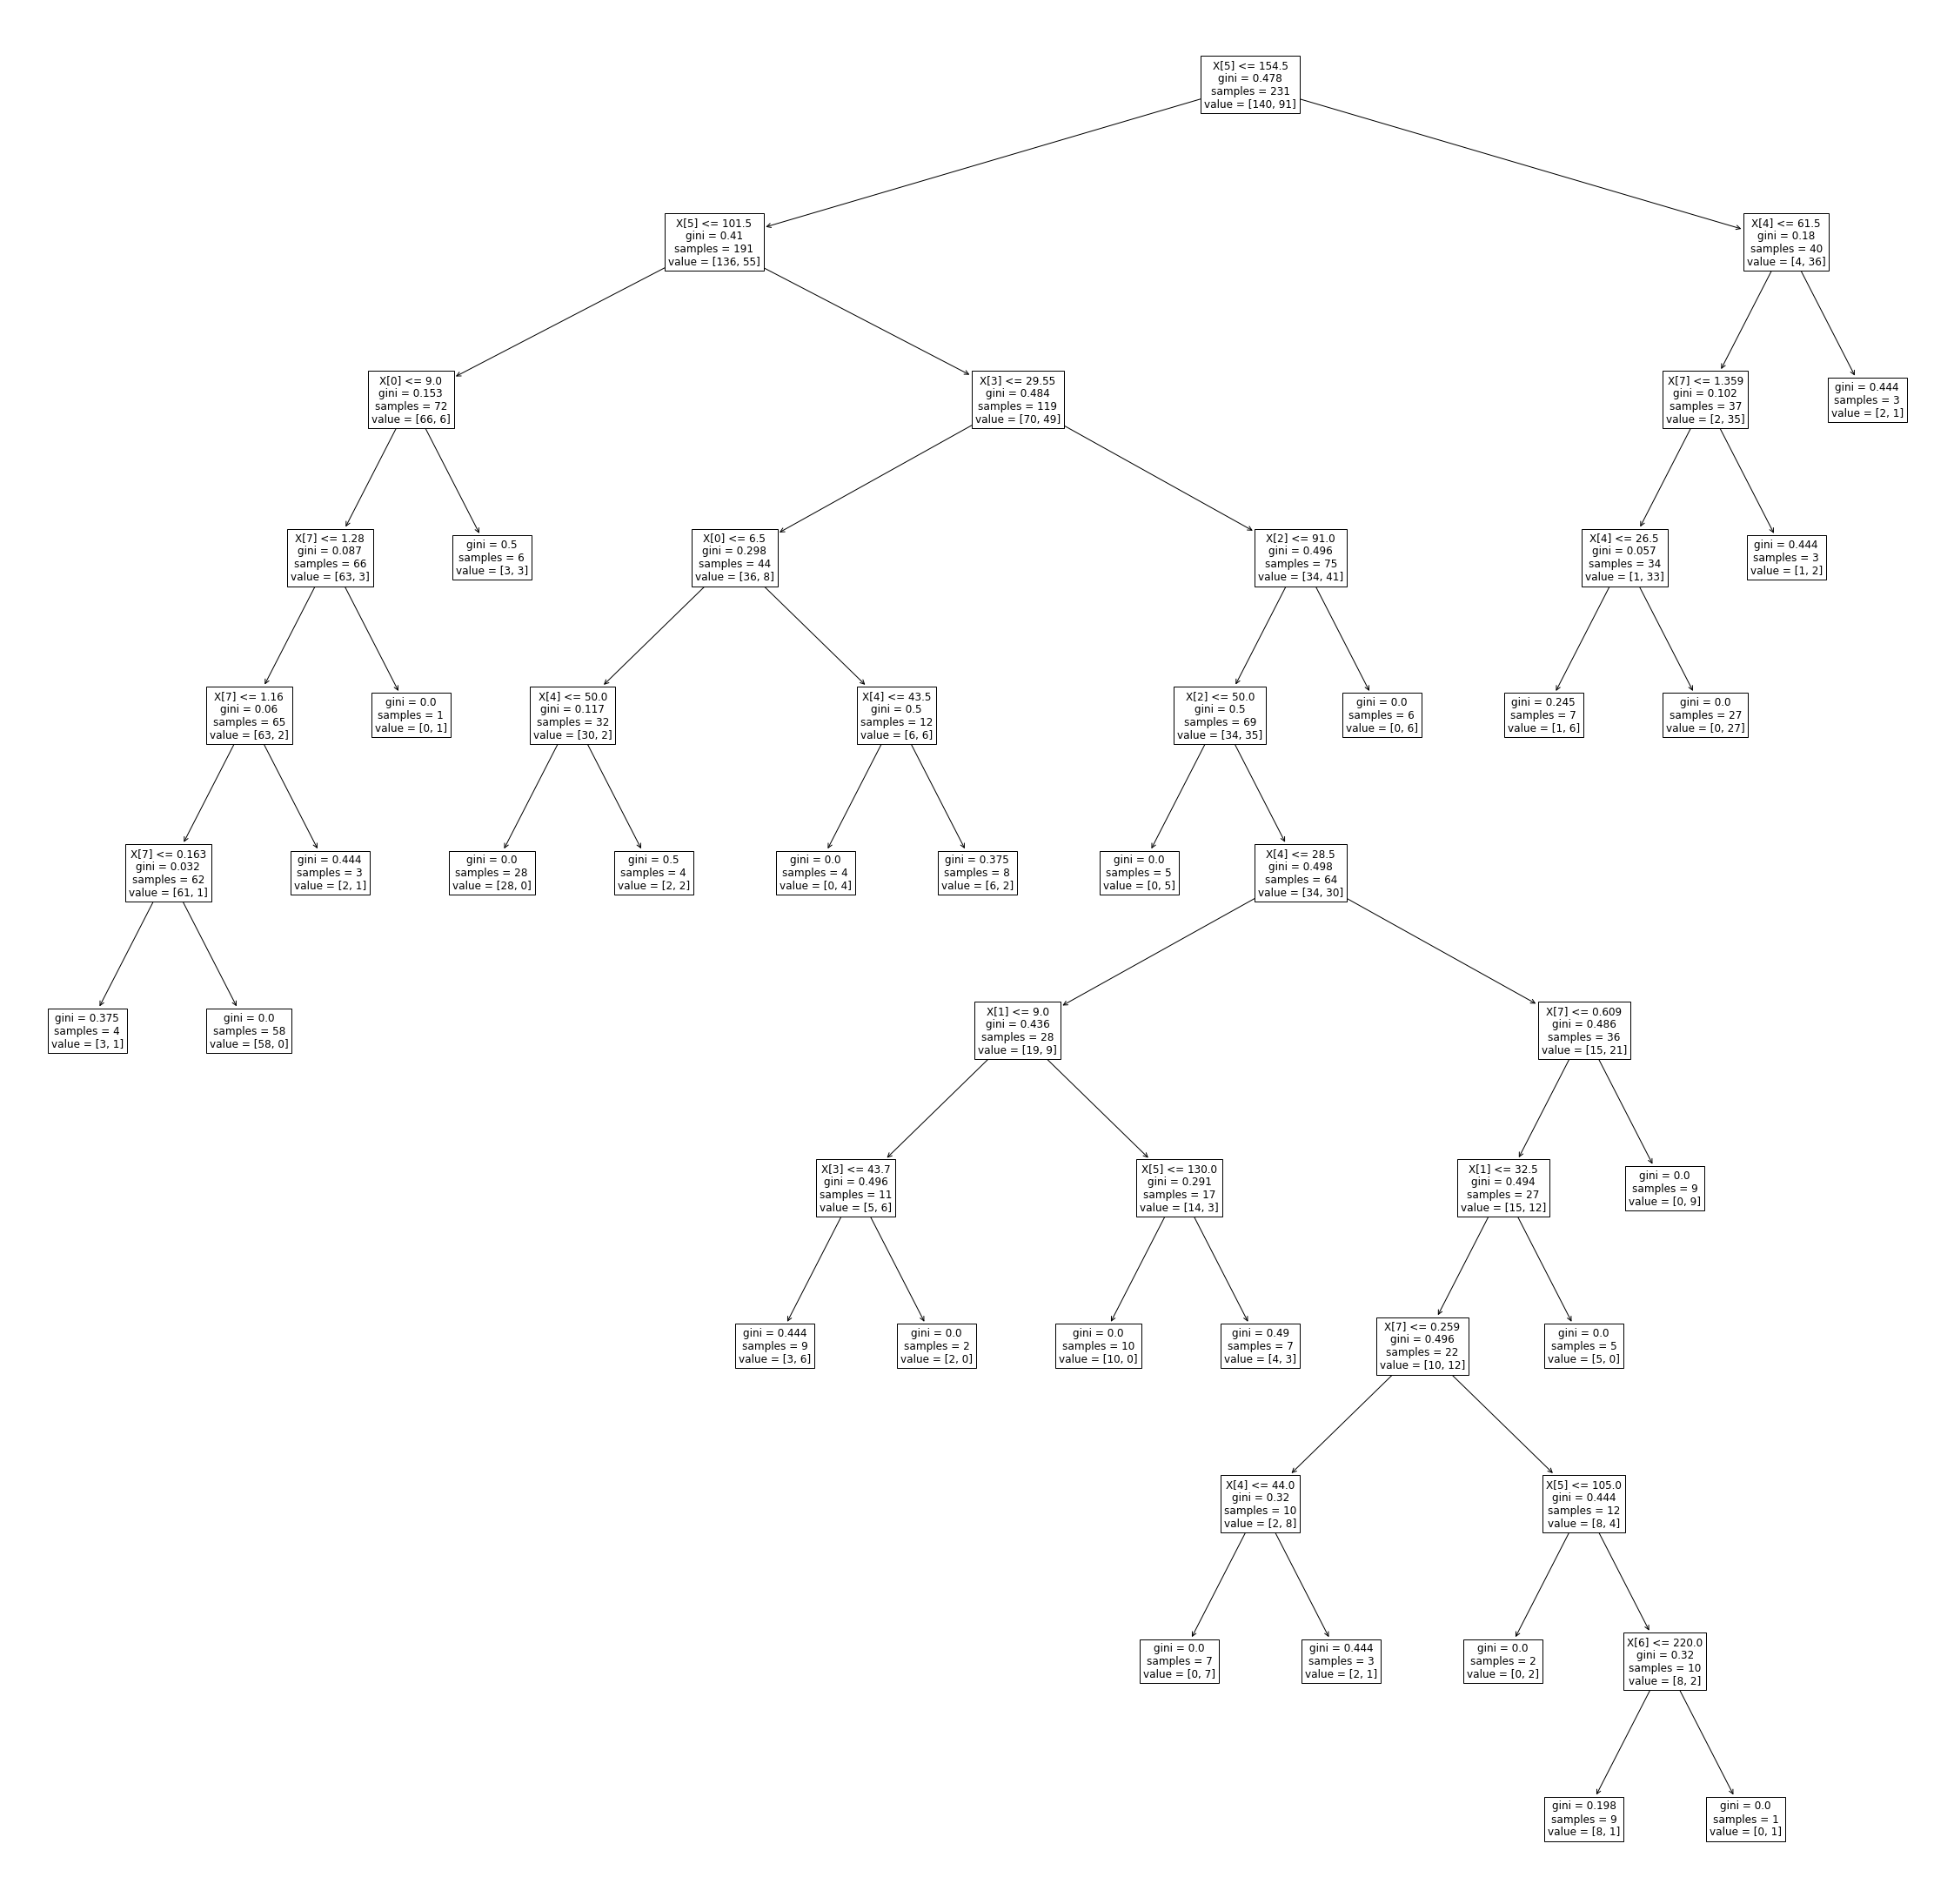


Min Samples Leaf = 10
-------
Dataset statistics:


Precision score 0.8533333333333334
Recall score 0.7032967032967034
F1-score score 0.7710843373493976
Accuracy score 0.8354978354978355


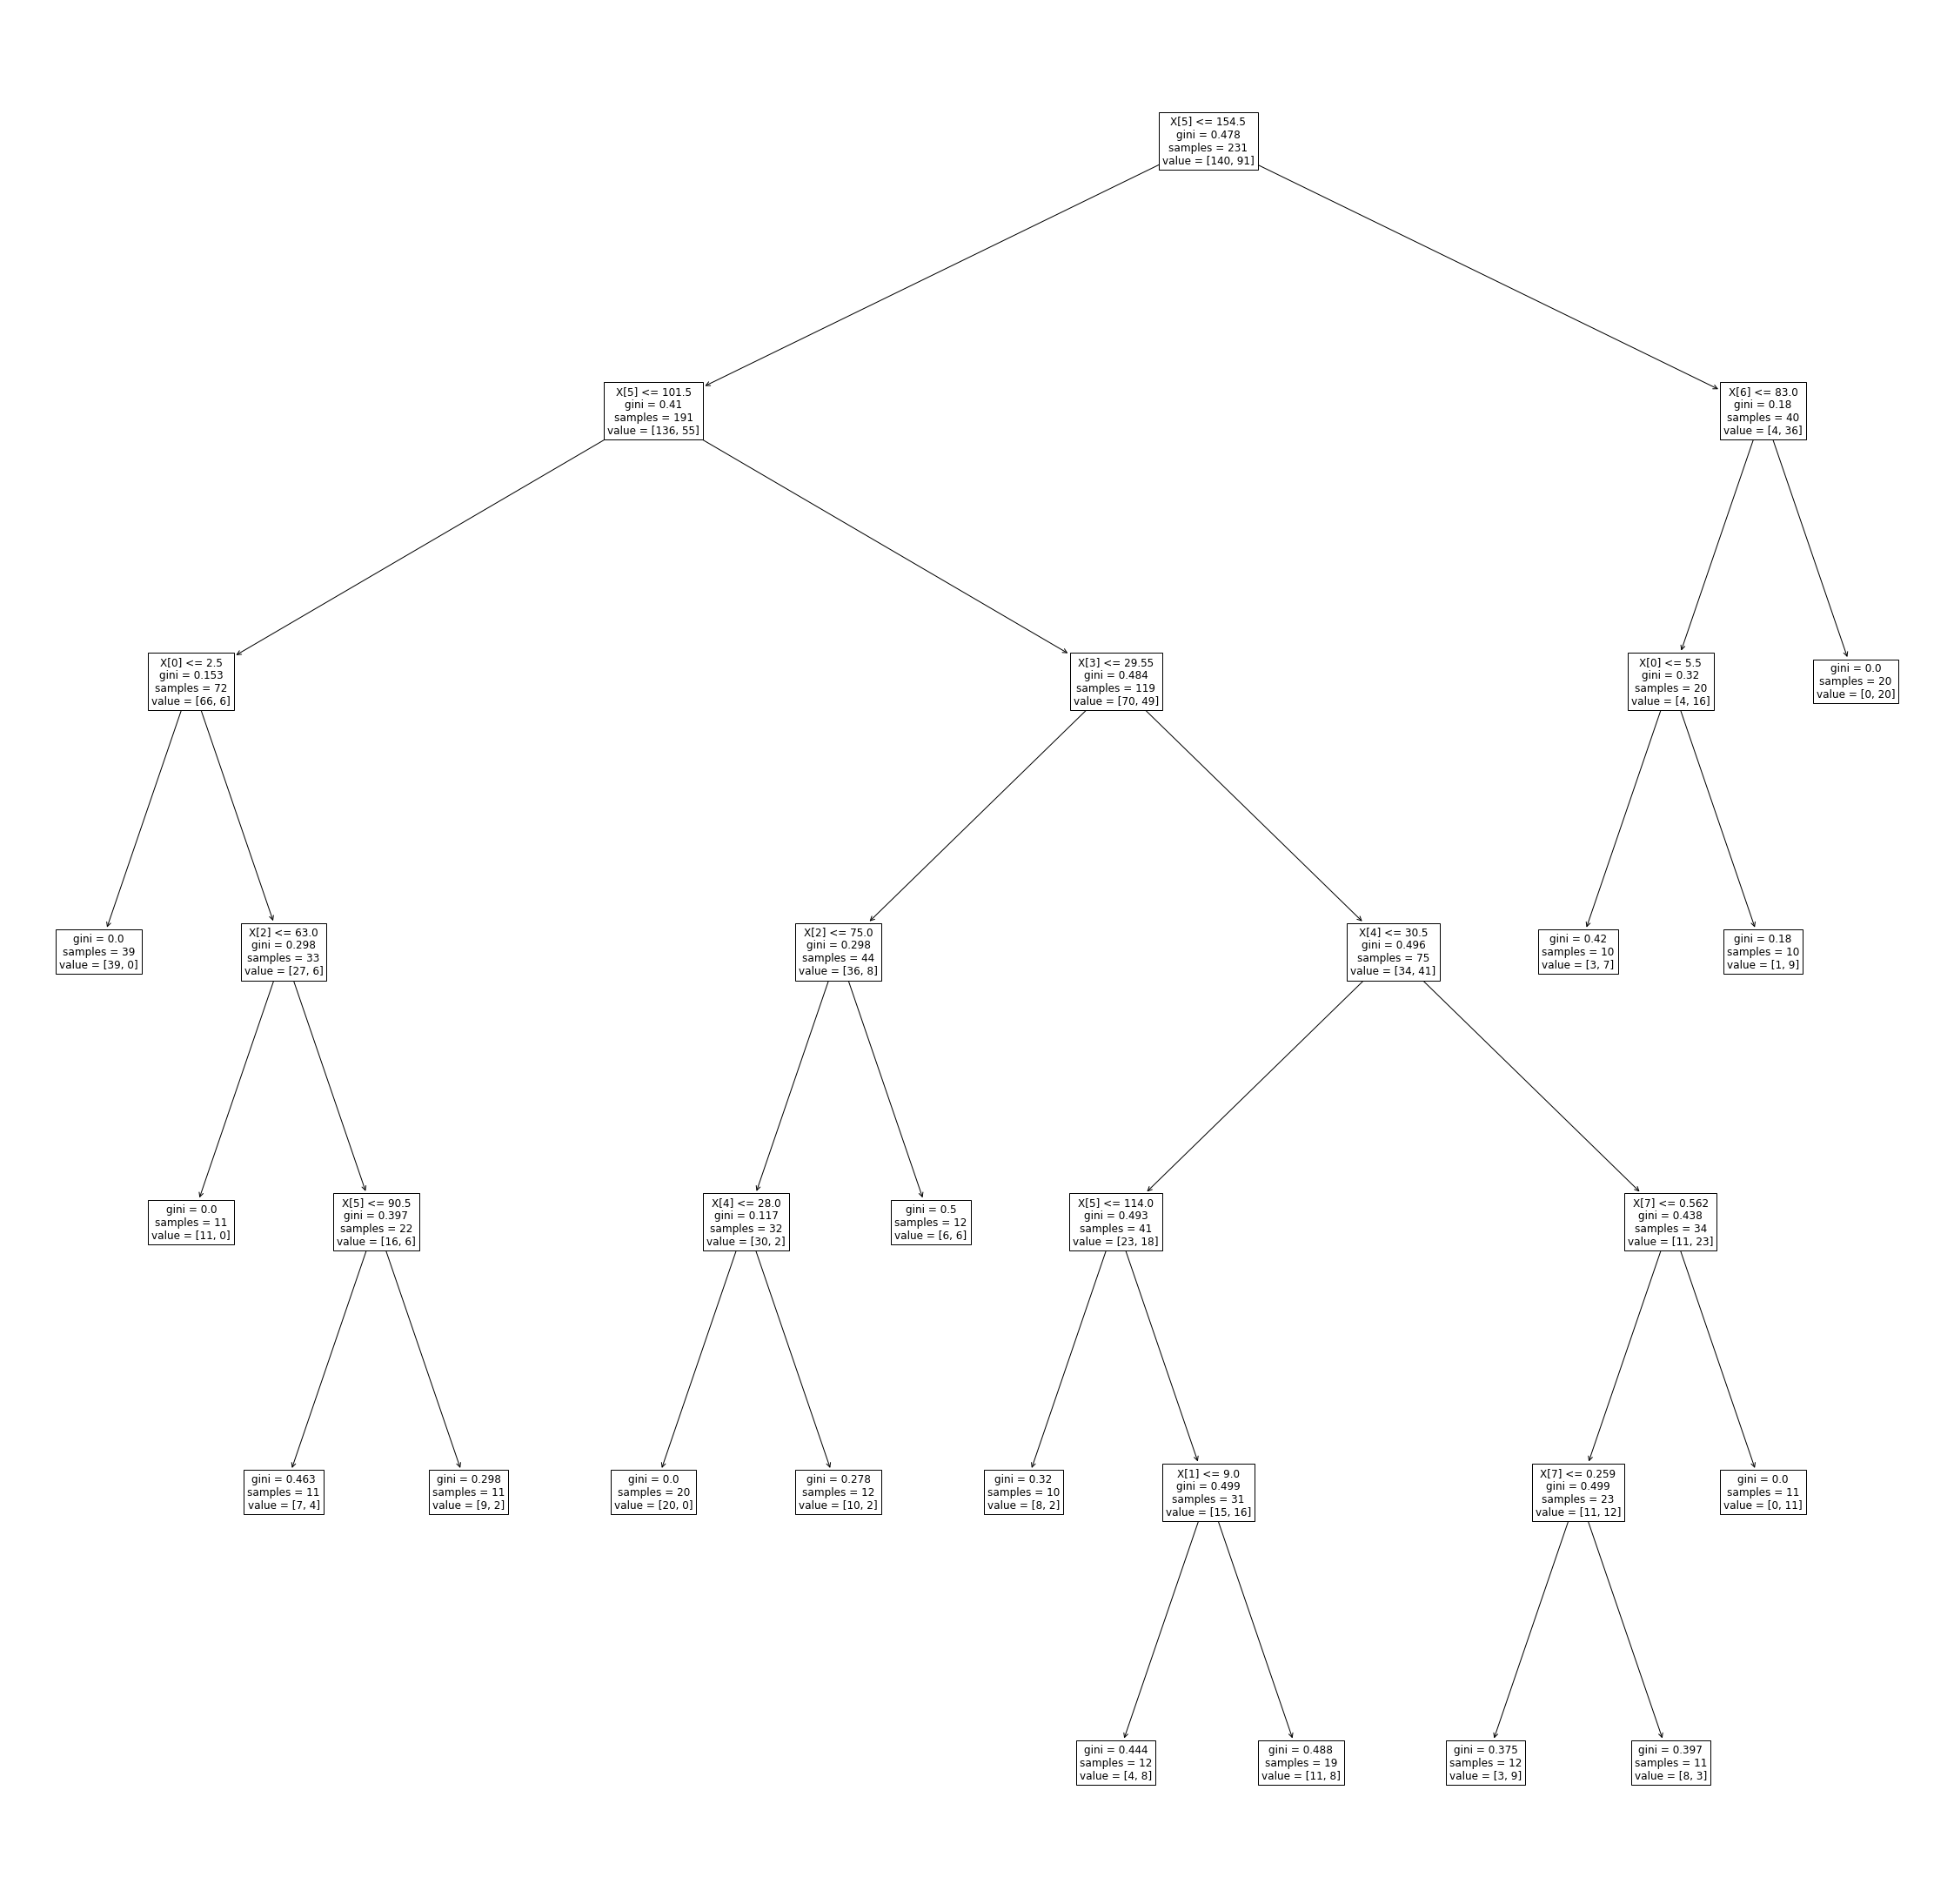


MAX Features = 4
-------
Dataset statistics:


Precision score 1.0
Recall score 1.0
F1-score score 1.0
Accuracy score 1.0


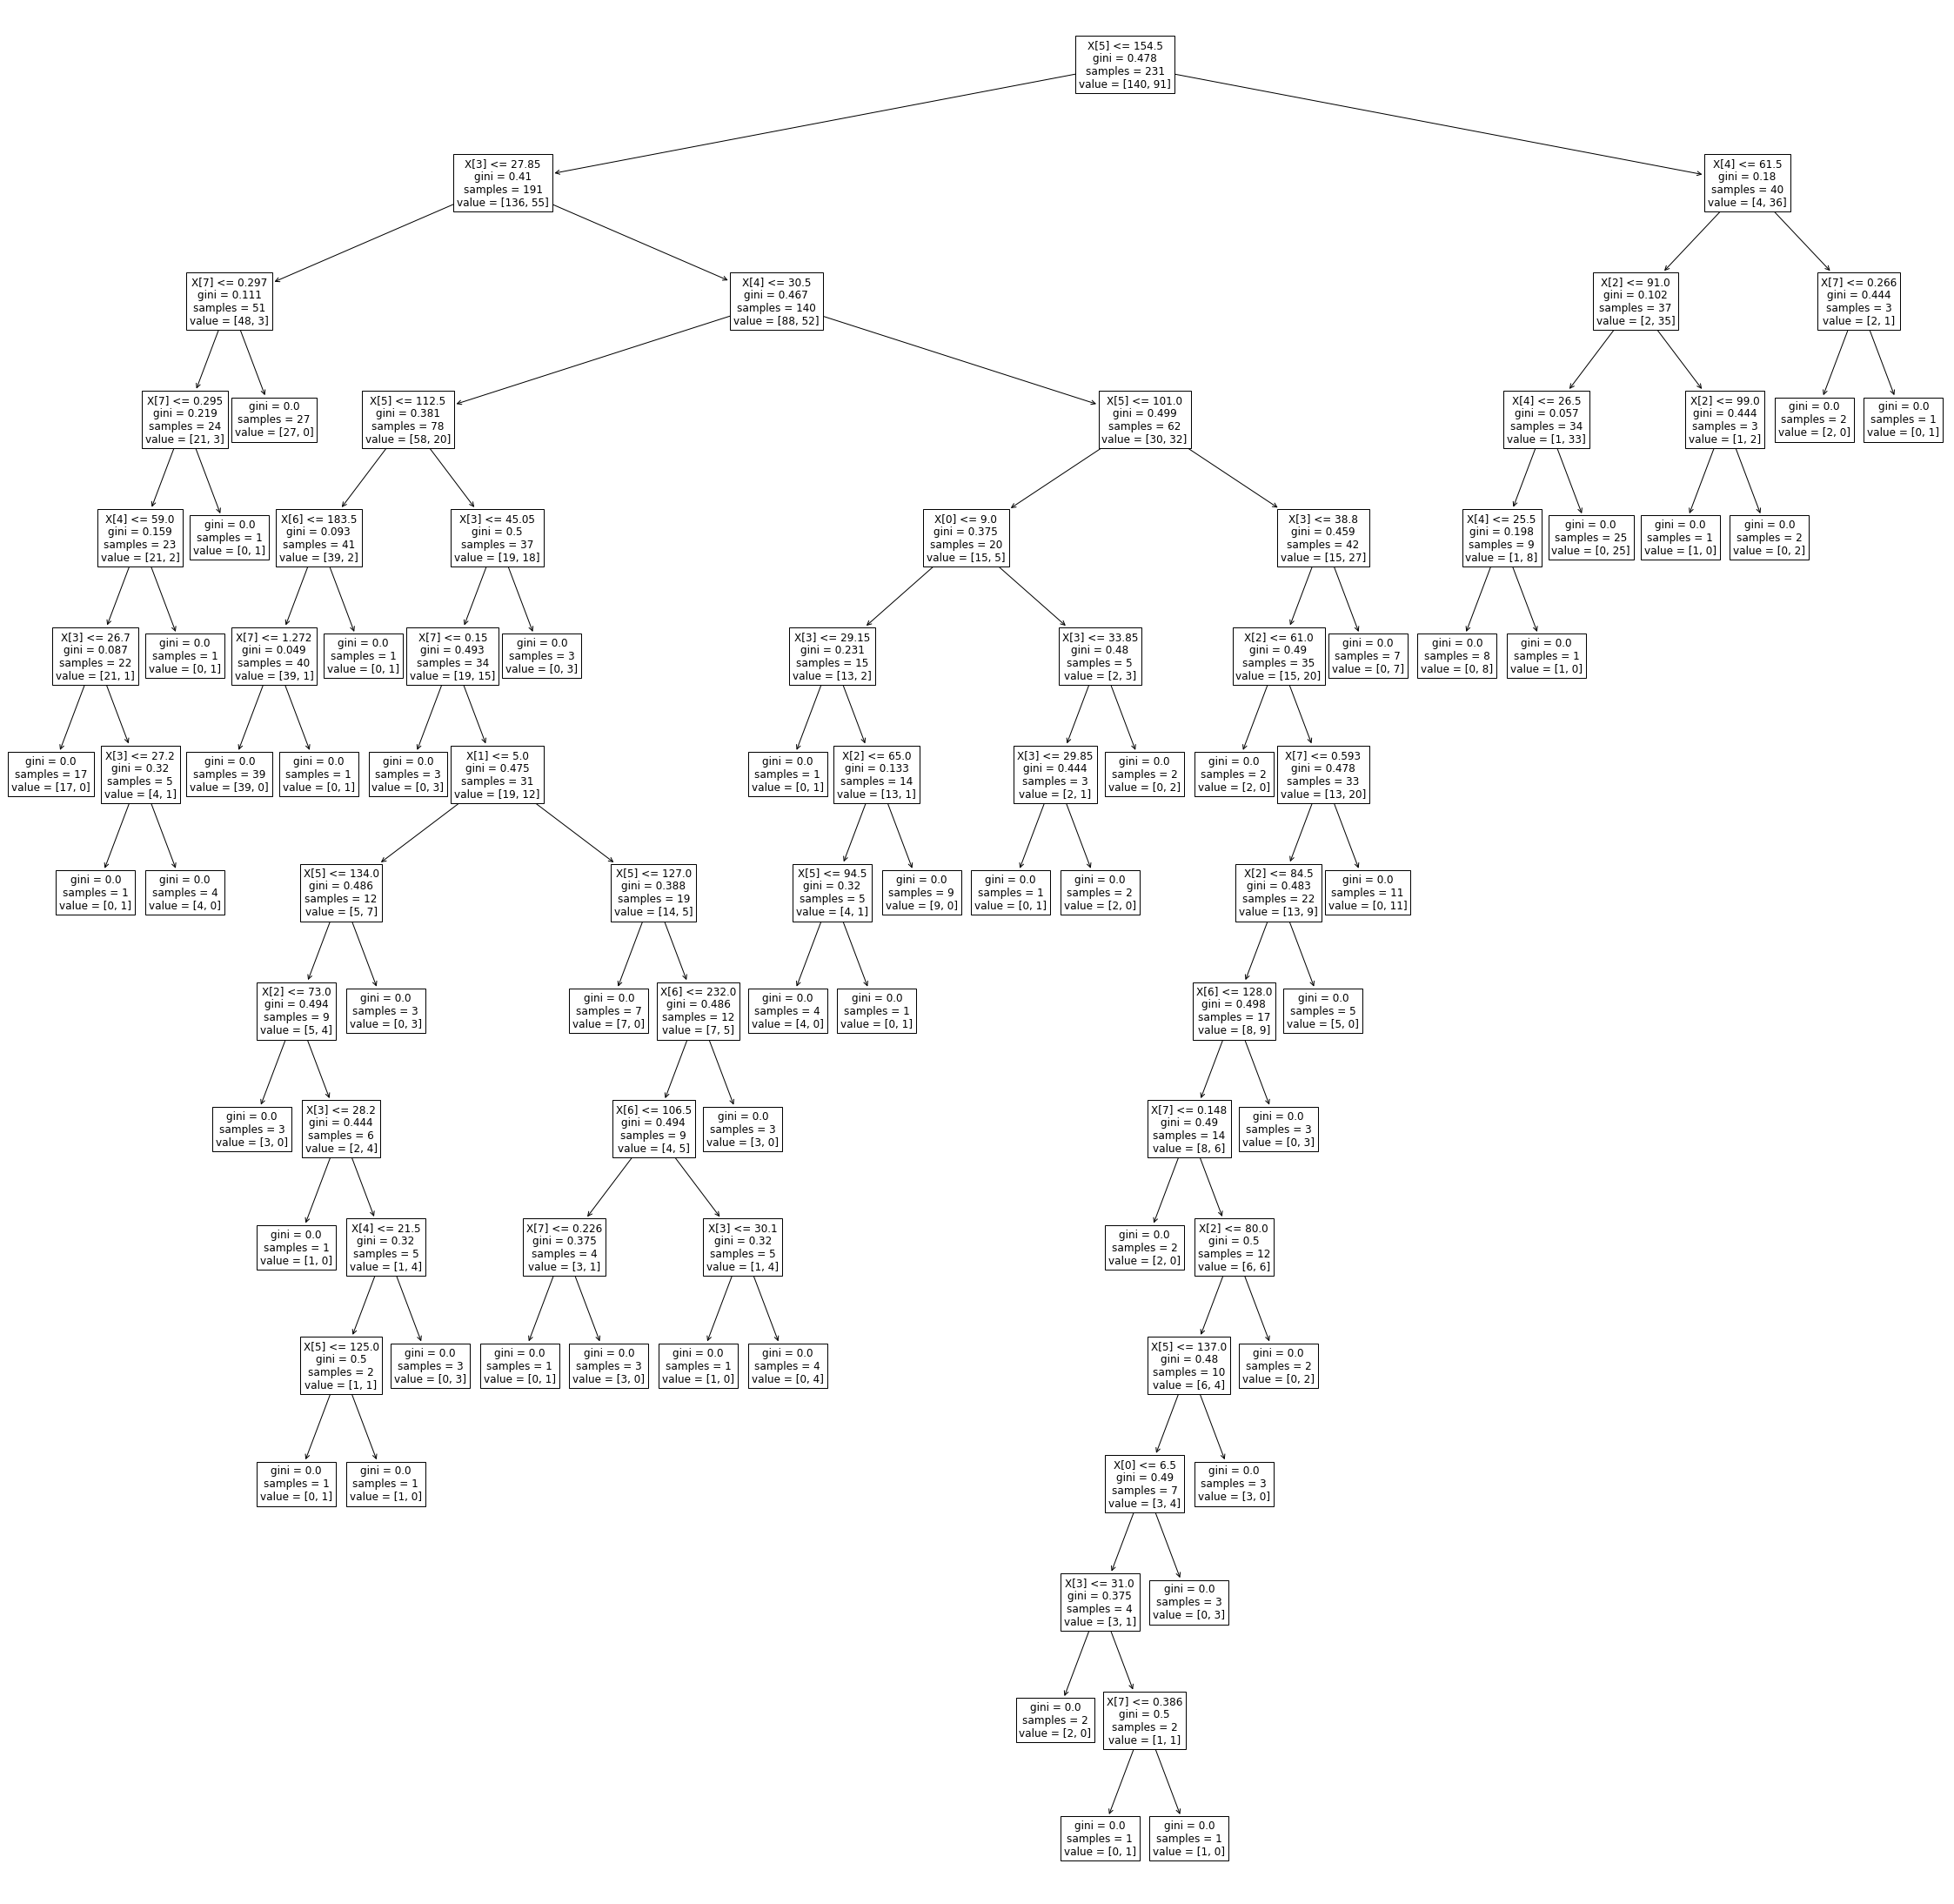


MAX Leaf Nodes = 10
-------
Dataset statistics:


Precision score 0.7912087912087912
Recall score 0.7912087912087912
F1-score score 0.7912087912087912
Accuracy score 0.8354978354978355


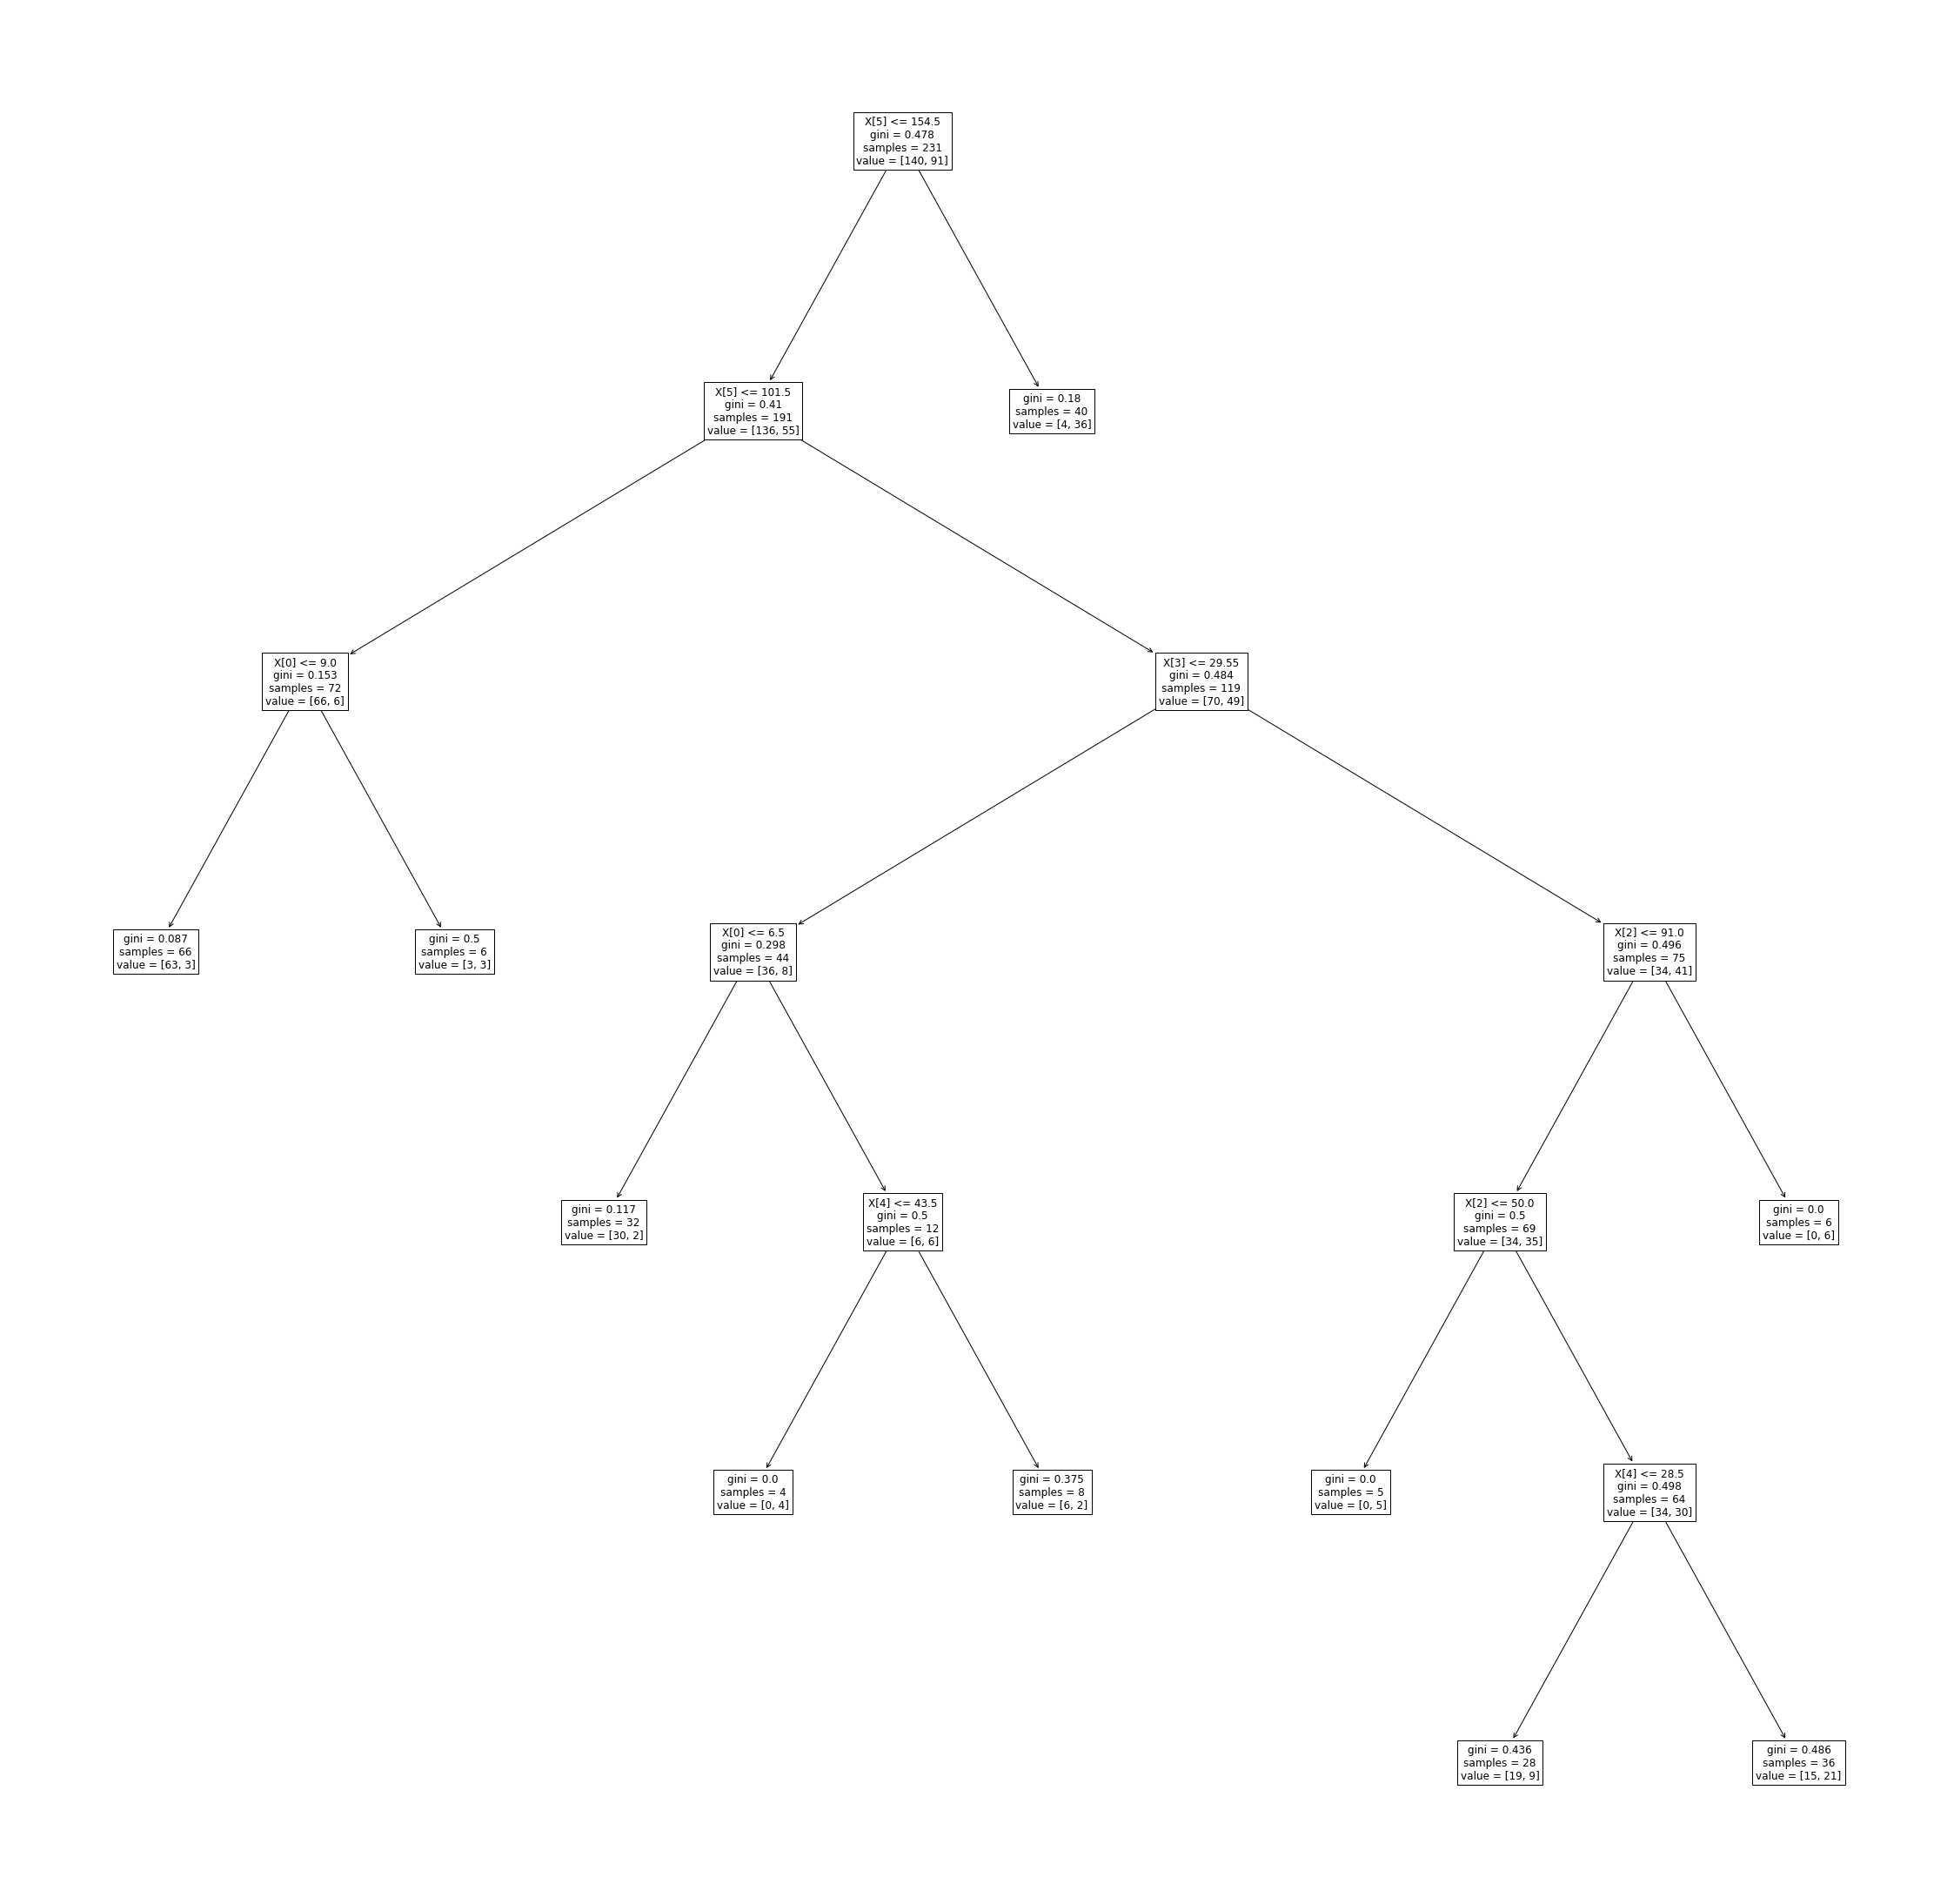


MIN Impurity Decrease = 0.001
-------
Dataset statistics:


Precision score 0.9891304347826086
Recall score 1.0
F1-score score 0.994535519125683
Accuracy score 0.9956709956709957


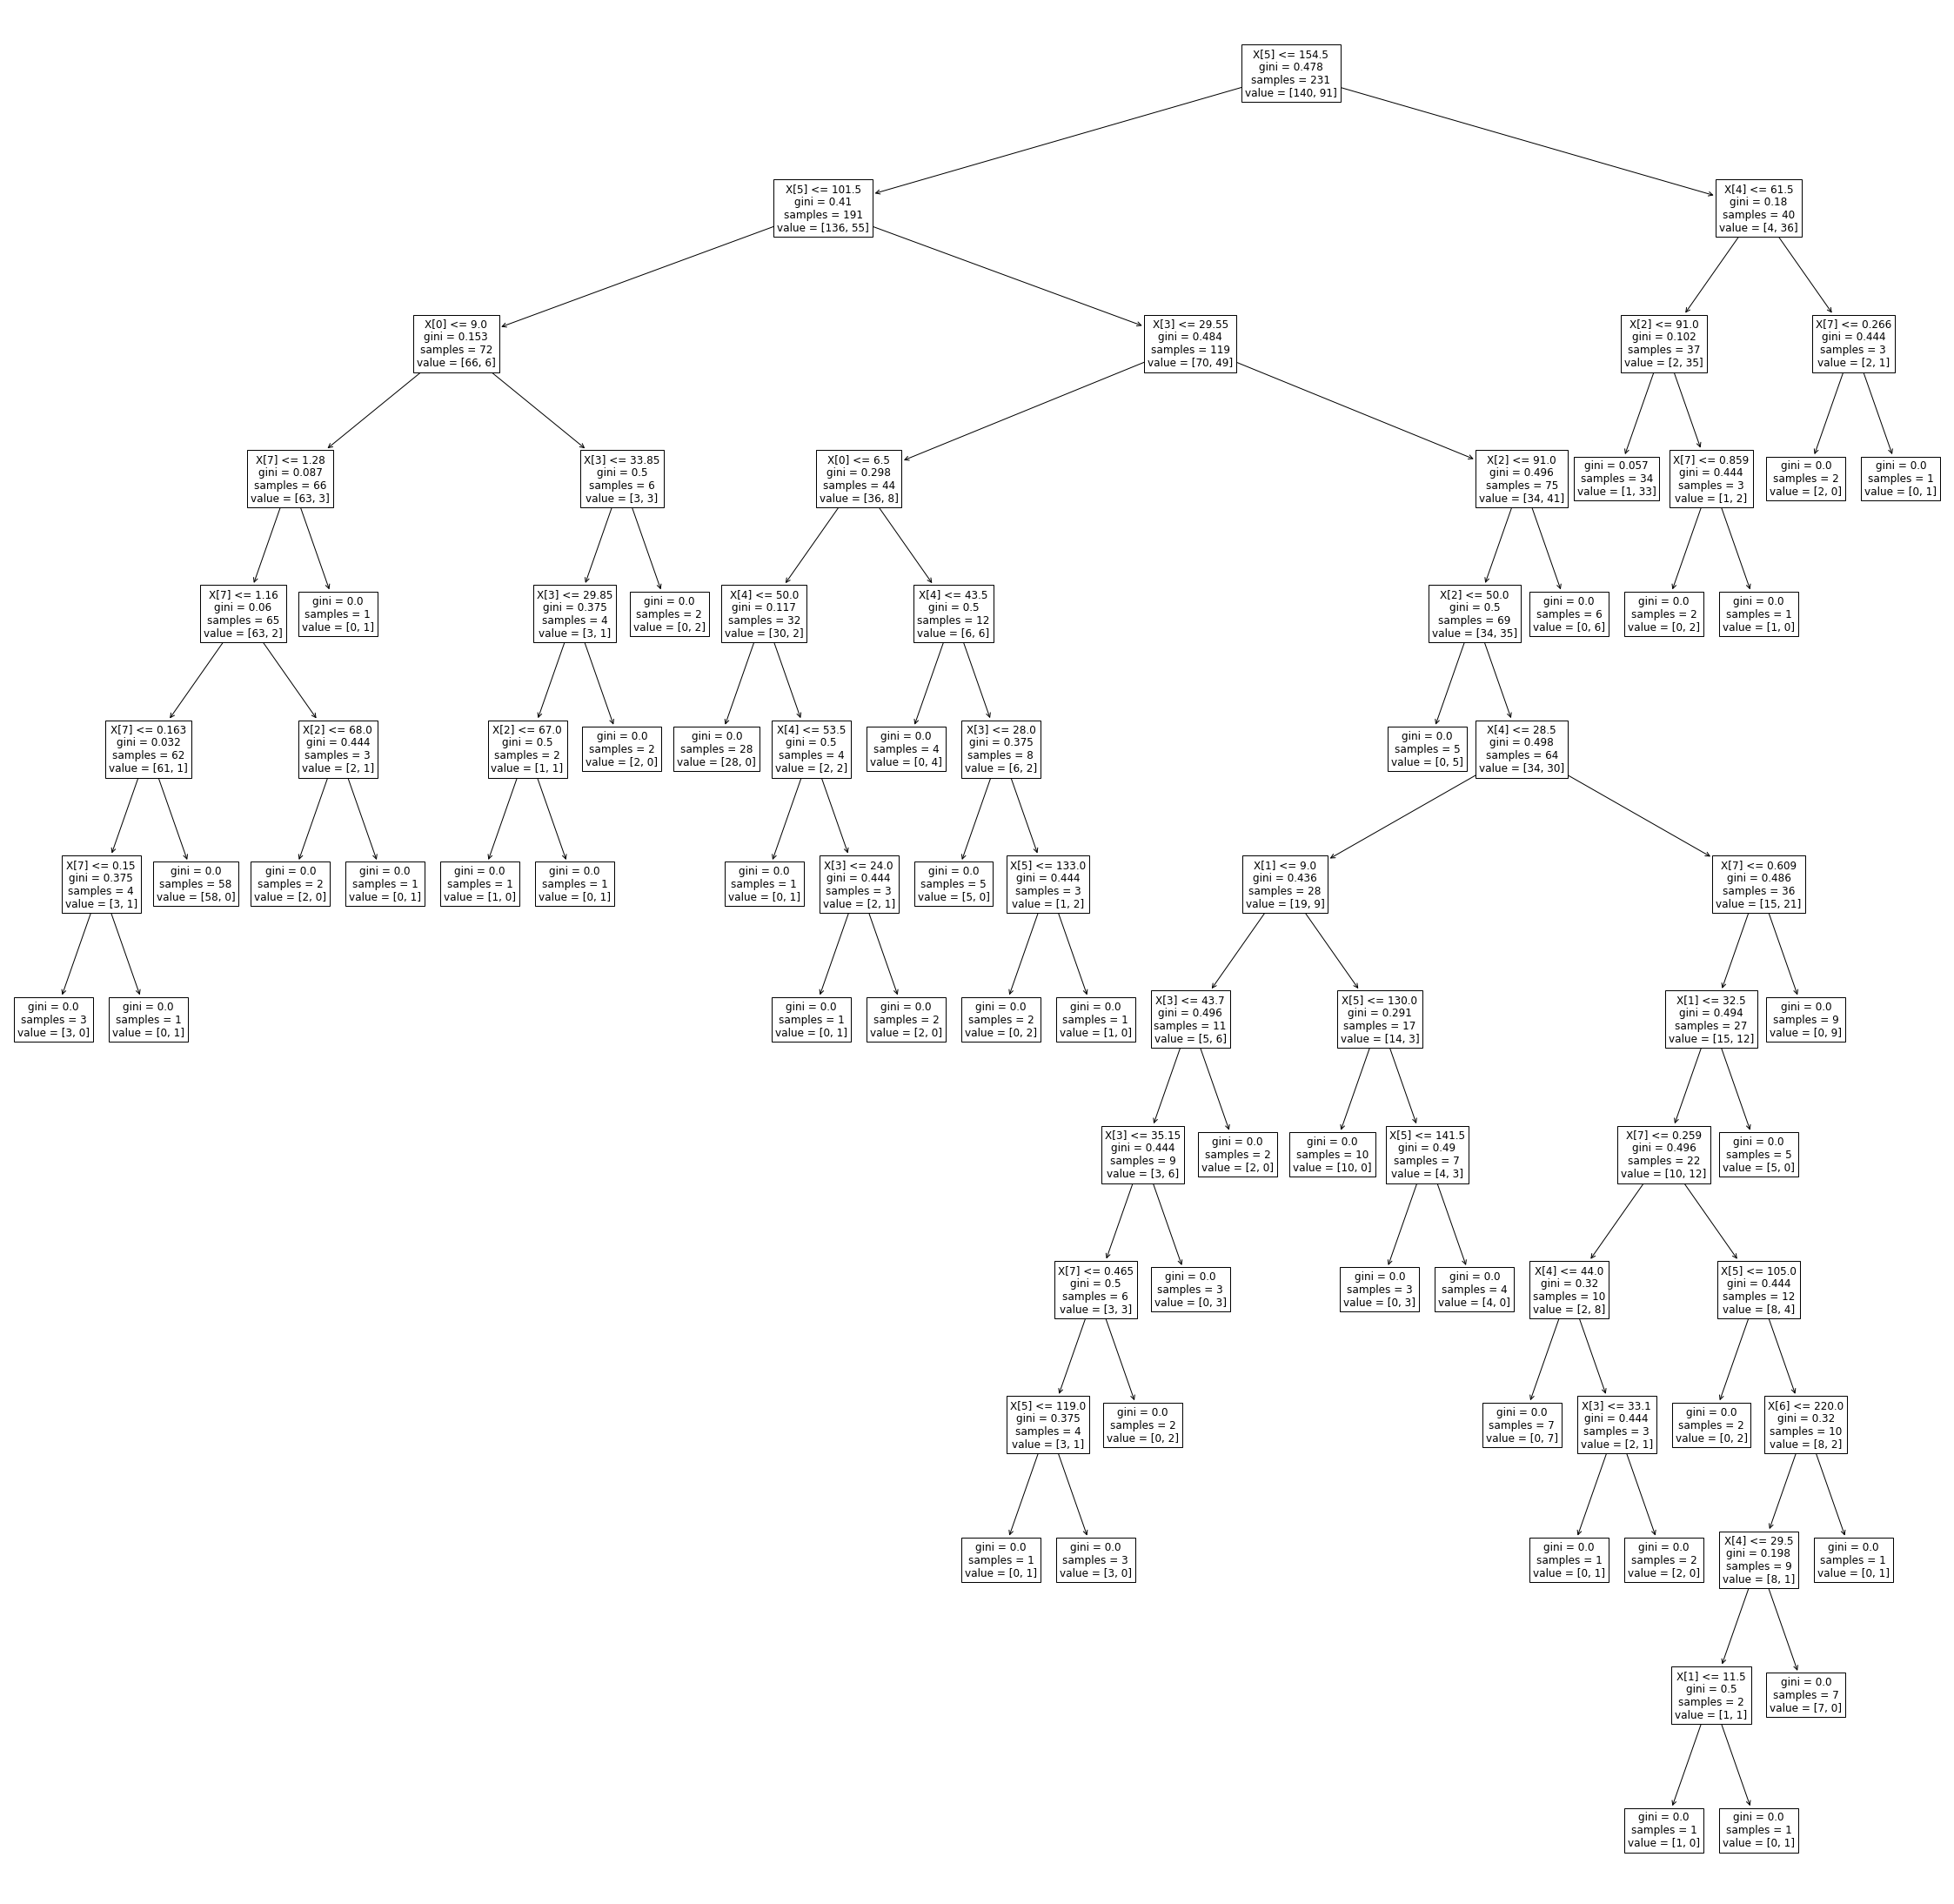


CCP Alpha = 0.001
-------
Dataset statistics:


Precision score 1.0
Recall score 1.0
F1-score score 1.0
Accuracy score 1.0


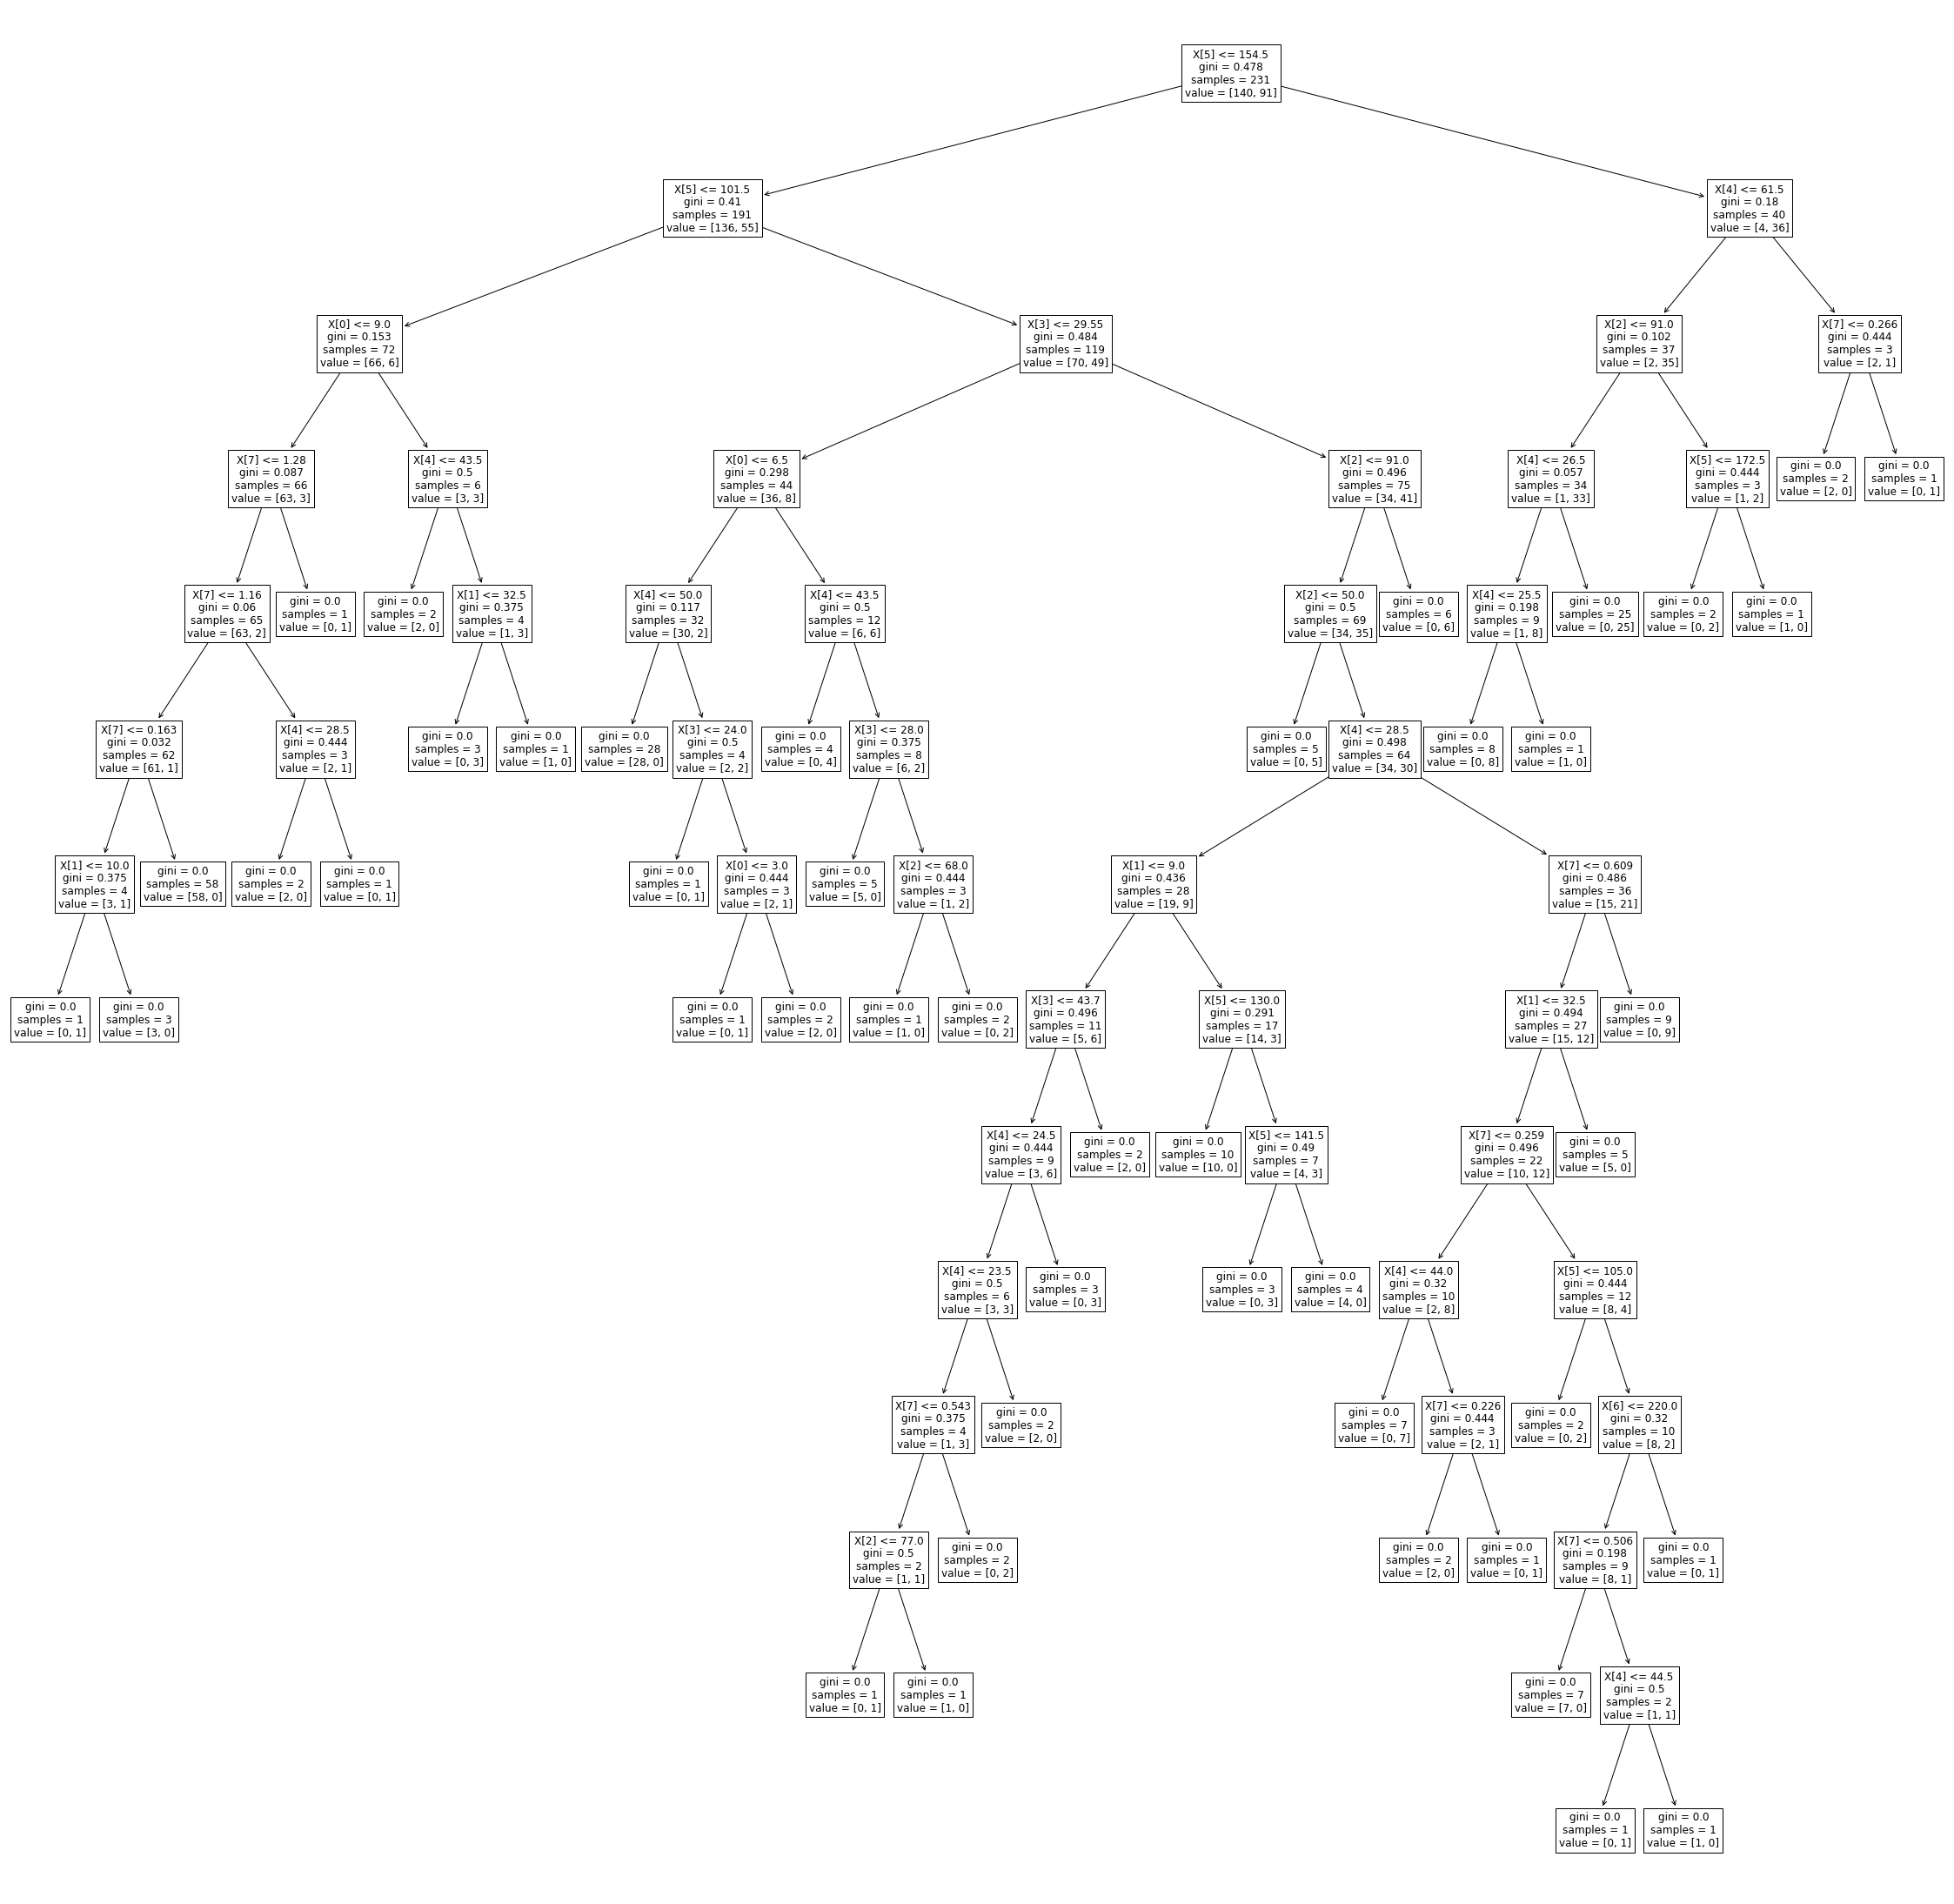

In [14]:
# Nowy klasyfikator - wytrenuj i wypisz wyniki
# Twój kod ...
print("Max depth = 4")
clf = tree.DecisionTreeClassifier(max_depth=4)
clf.fit(X_test, y_test)
print_scores(clf, X_test, y_test)
plt.figure(figsize=(40,40))
tree.plot_tree(clf, fontsize=12)
plt.show()
print("\nMin Samples Split = 10")

clf = tree.DecisionTreeClassifier(min_samples_split=10)
clf.fit(X_test, y_test)
print_scores(clf, X_test, y_test)
plt.figure(figsize=(40,40))
tree.plot_tree(clf, fontsize=12)
plt.show()
print("\nMin Samples Leaf = 10")

clf = tree.DecisionTreeClassifier(min_samples_leaf=10)
clf.fit(X_test, y_test)
print_scores(clf, X_test, y_test)
plt.figure(figsize=(40,40))
tree.plot_tree(clf, fontsize=12)
plt.show()

print("\nMAX Features = 4")
clf = tree.DecisionTreeClassifier(max_features=4)
clf.fit(X_test, y_test)
print_scores(clf, X_test, y_test)
plt.figure(figsize=(40,40))
tree.plot_tree(clf, fontsize=12)
plt.show()

print("\nMAX Leaf Nodes = 10")
clf = tree.DecisionTreeClassifier(max_leaf_nodes=10)
clf.fit(X_test, y_test)
print_scores(clf, X_test, y_test)
plt.figure(figsize=(40,40))
tree.plot_tree(clf, fontsize=12)
plt.show()

print("\nMIN Impurity Decrease = 0.001")
clf = tree.DecisionTreeClassifier(min_impurity_decrease=0.001)
clf.fit(X_test, y_test)
print_scores(clf, X_test, y_test)
plt.figure(figsize=(40,40))
tree.plot_tree(clf, fontsize=12)
plt.show()

print("\nCCP Alpha = 0.001")
clf = tree.DecisionTreeClassifier(ccp_alpha=0.001)
clf.fit(X_test, y_test)
print_scores(clf, X_test, y_test)
plt.figure(figsize=(40,40))
tree.plot_tree(clf, fontsize=12)
plt.show()

# 5. Zadanie (1 pkt)

Poeksperymentuj z parametrami związanymi z metodami, które wypisałeś_aś w poprzednim zadaniu. Wybierz najlepszy zestaw parametrów i po raz kolejny wyrysuj drzewo.

Max depth = 40
-------
Dataset statistics:


Precision score 0.7333333333333333
Recall score 0.7252747252747253
F1-score score 0.7292817679558011
Accuracy score 0.7878787878787878


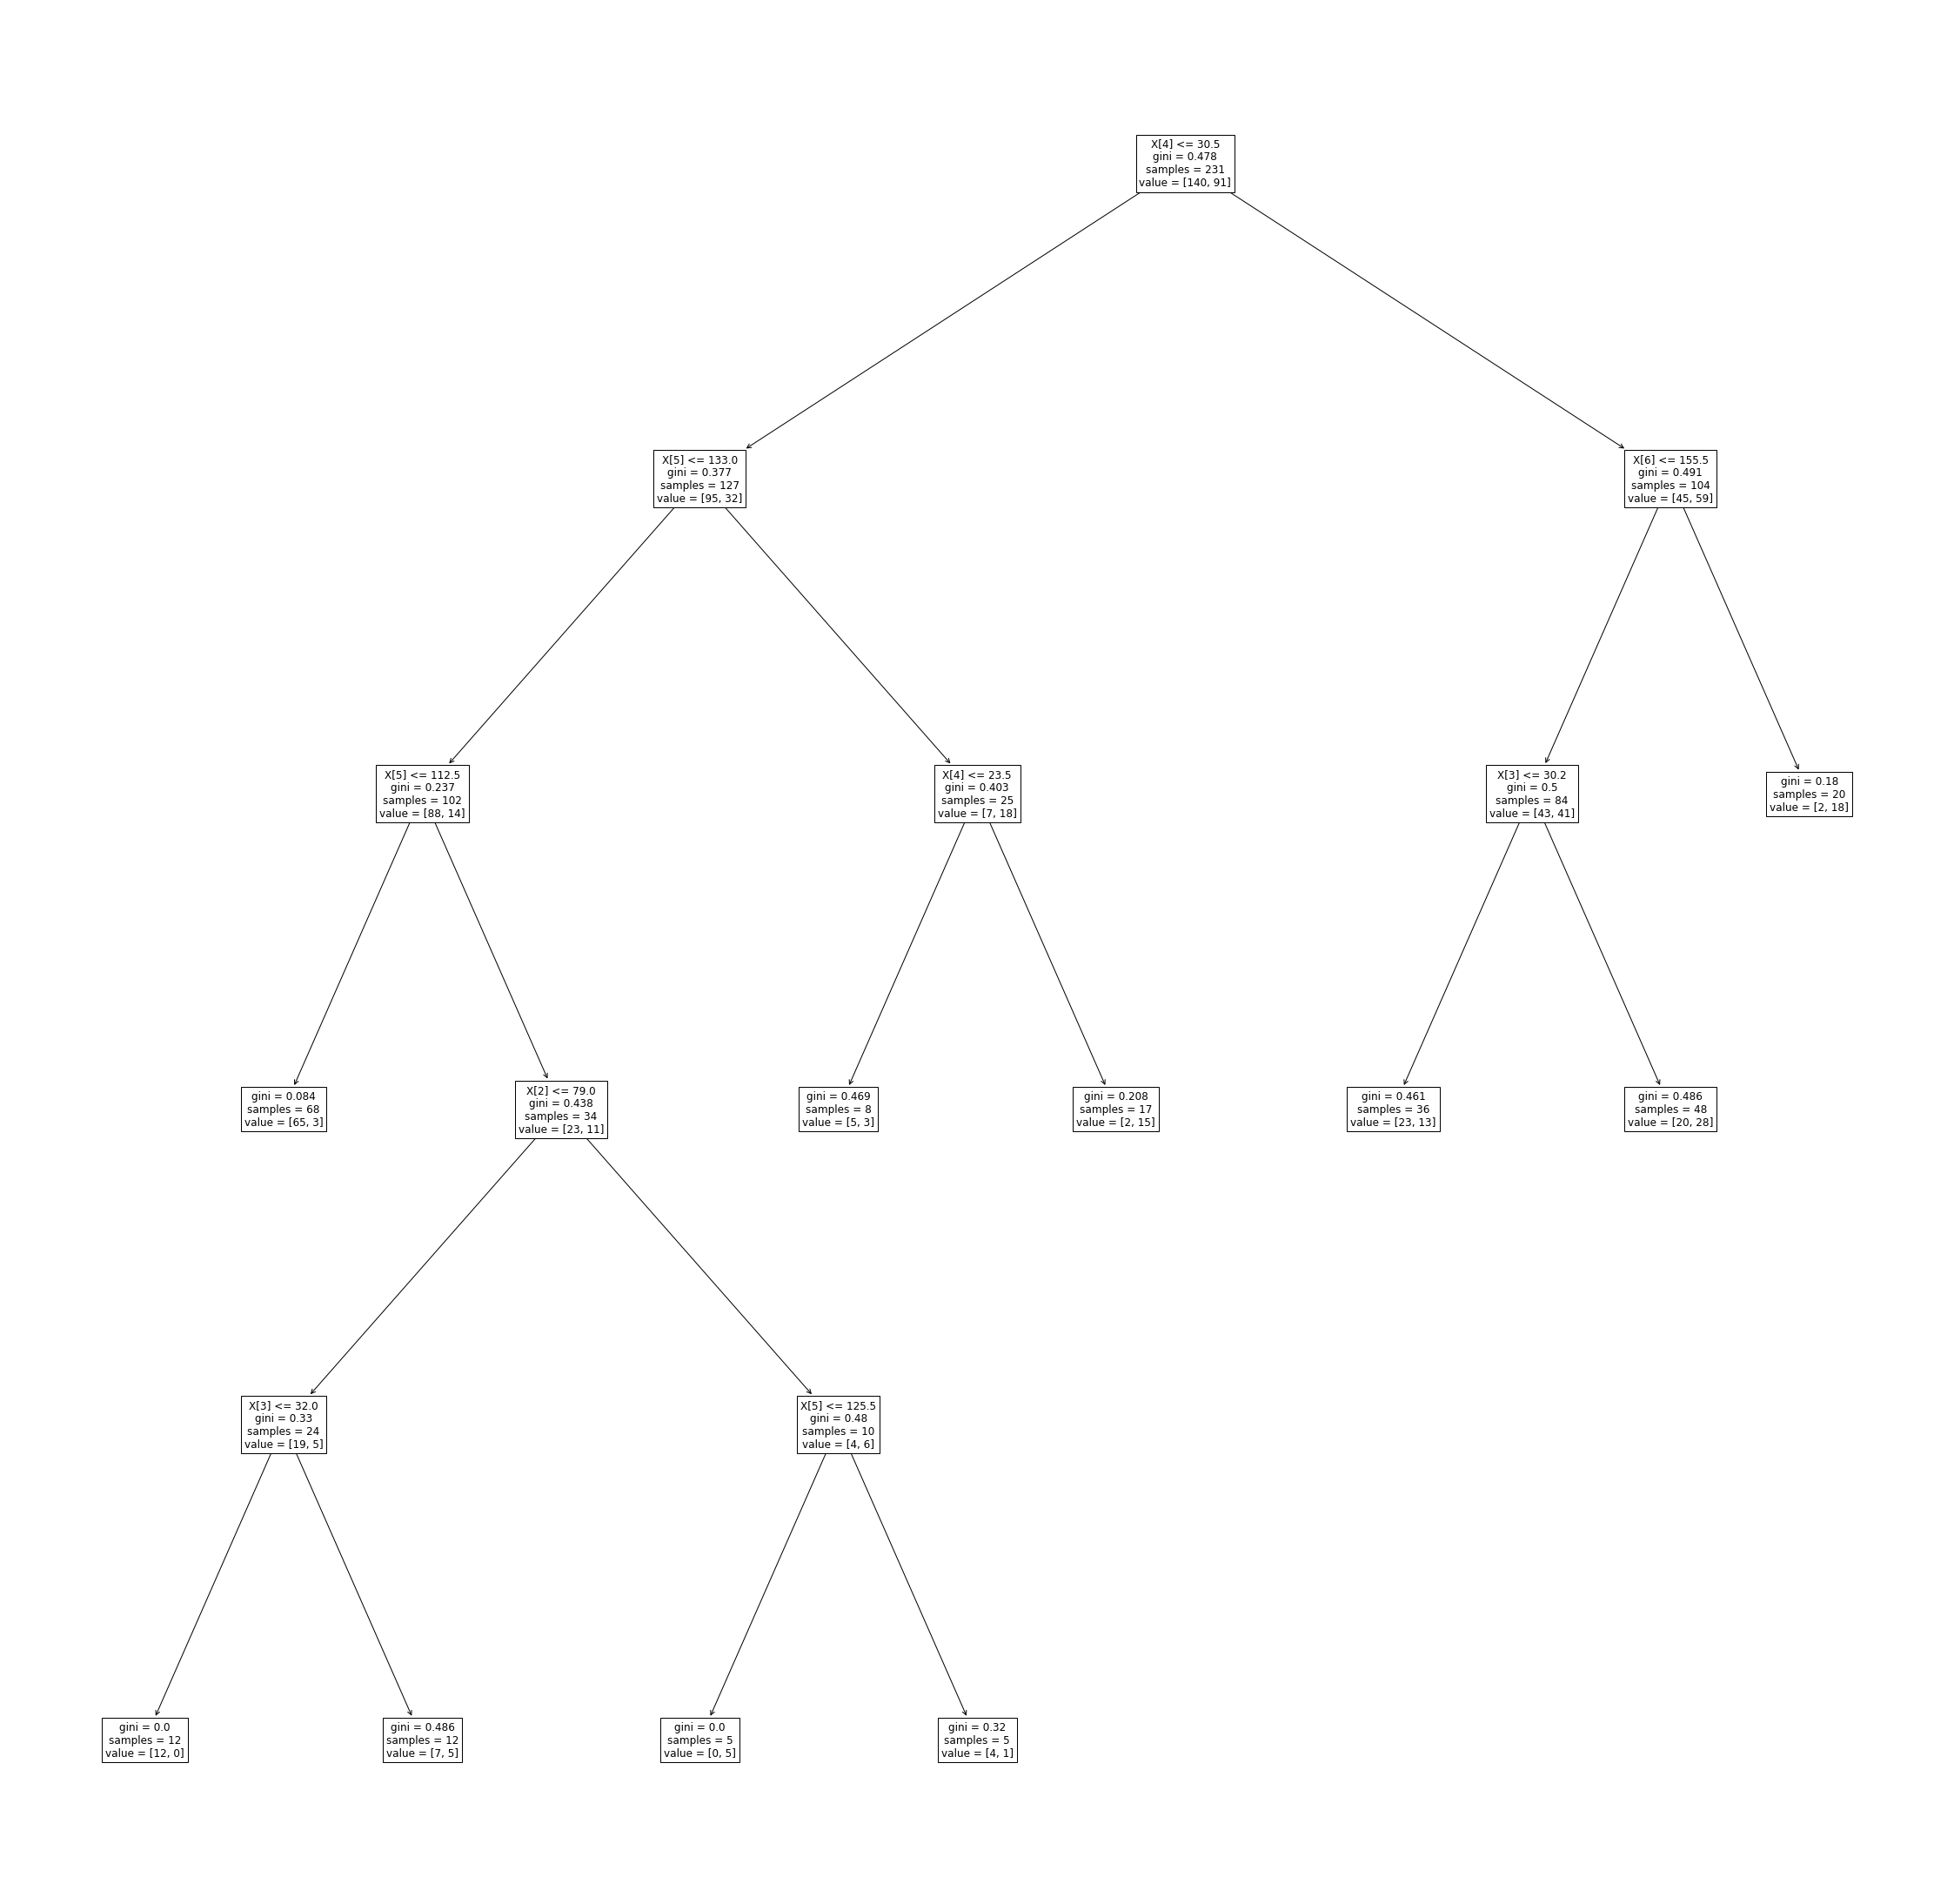

In [15]:
# Wyrysuj nowe drzewo:

print("Max depth = 40")
clf = tree.DecisionTreeClassifier(max_depth=7, min_samples_split=10, min_samples_leaf=5, max_features=4, max_leaf_nodes=10, min_impurity_decrease=0.001, ccp_alpha=0.001)
clf.fit(X_test, y_test)
print_scores(clf, X_test, y_test)
plt.figure(figsize=(40,40))
tree.plot_tree(clf, fontsize=12)
plt.show()

### Lasy losowe

# 6. Zadanie (2 pkt) 

Stwórz klasyfikator oparty o lasy losowe i sprawdź, jak polepszyło to klasyfikację Cukrzycy. Czy dobrane w poprzednim zadaniu parametry sprawdzają się przy lasach losowych?

-------
Dataset statistics:


Precision score 0.7333333333333333
Recall score 0.7252747252747253
F1-score score 0.7292817679558011
Accuracy score 0.7878787878787878


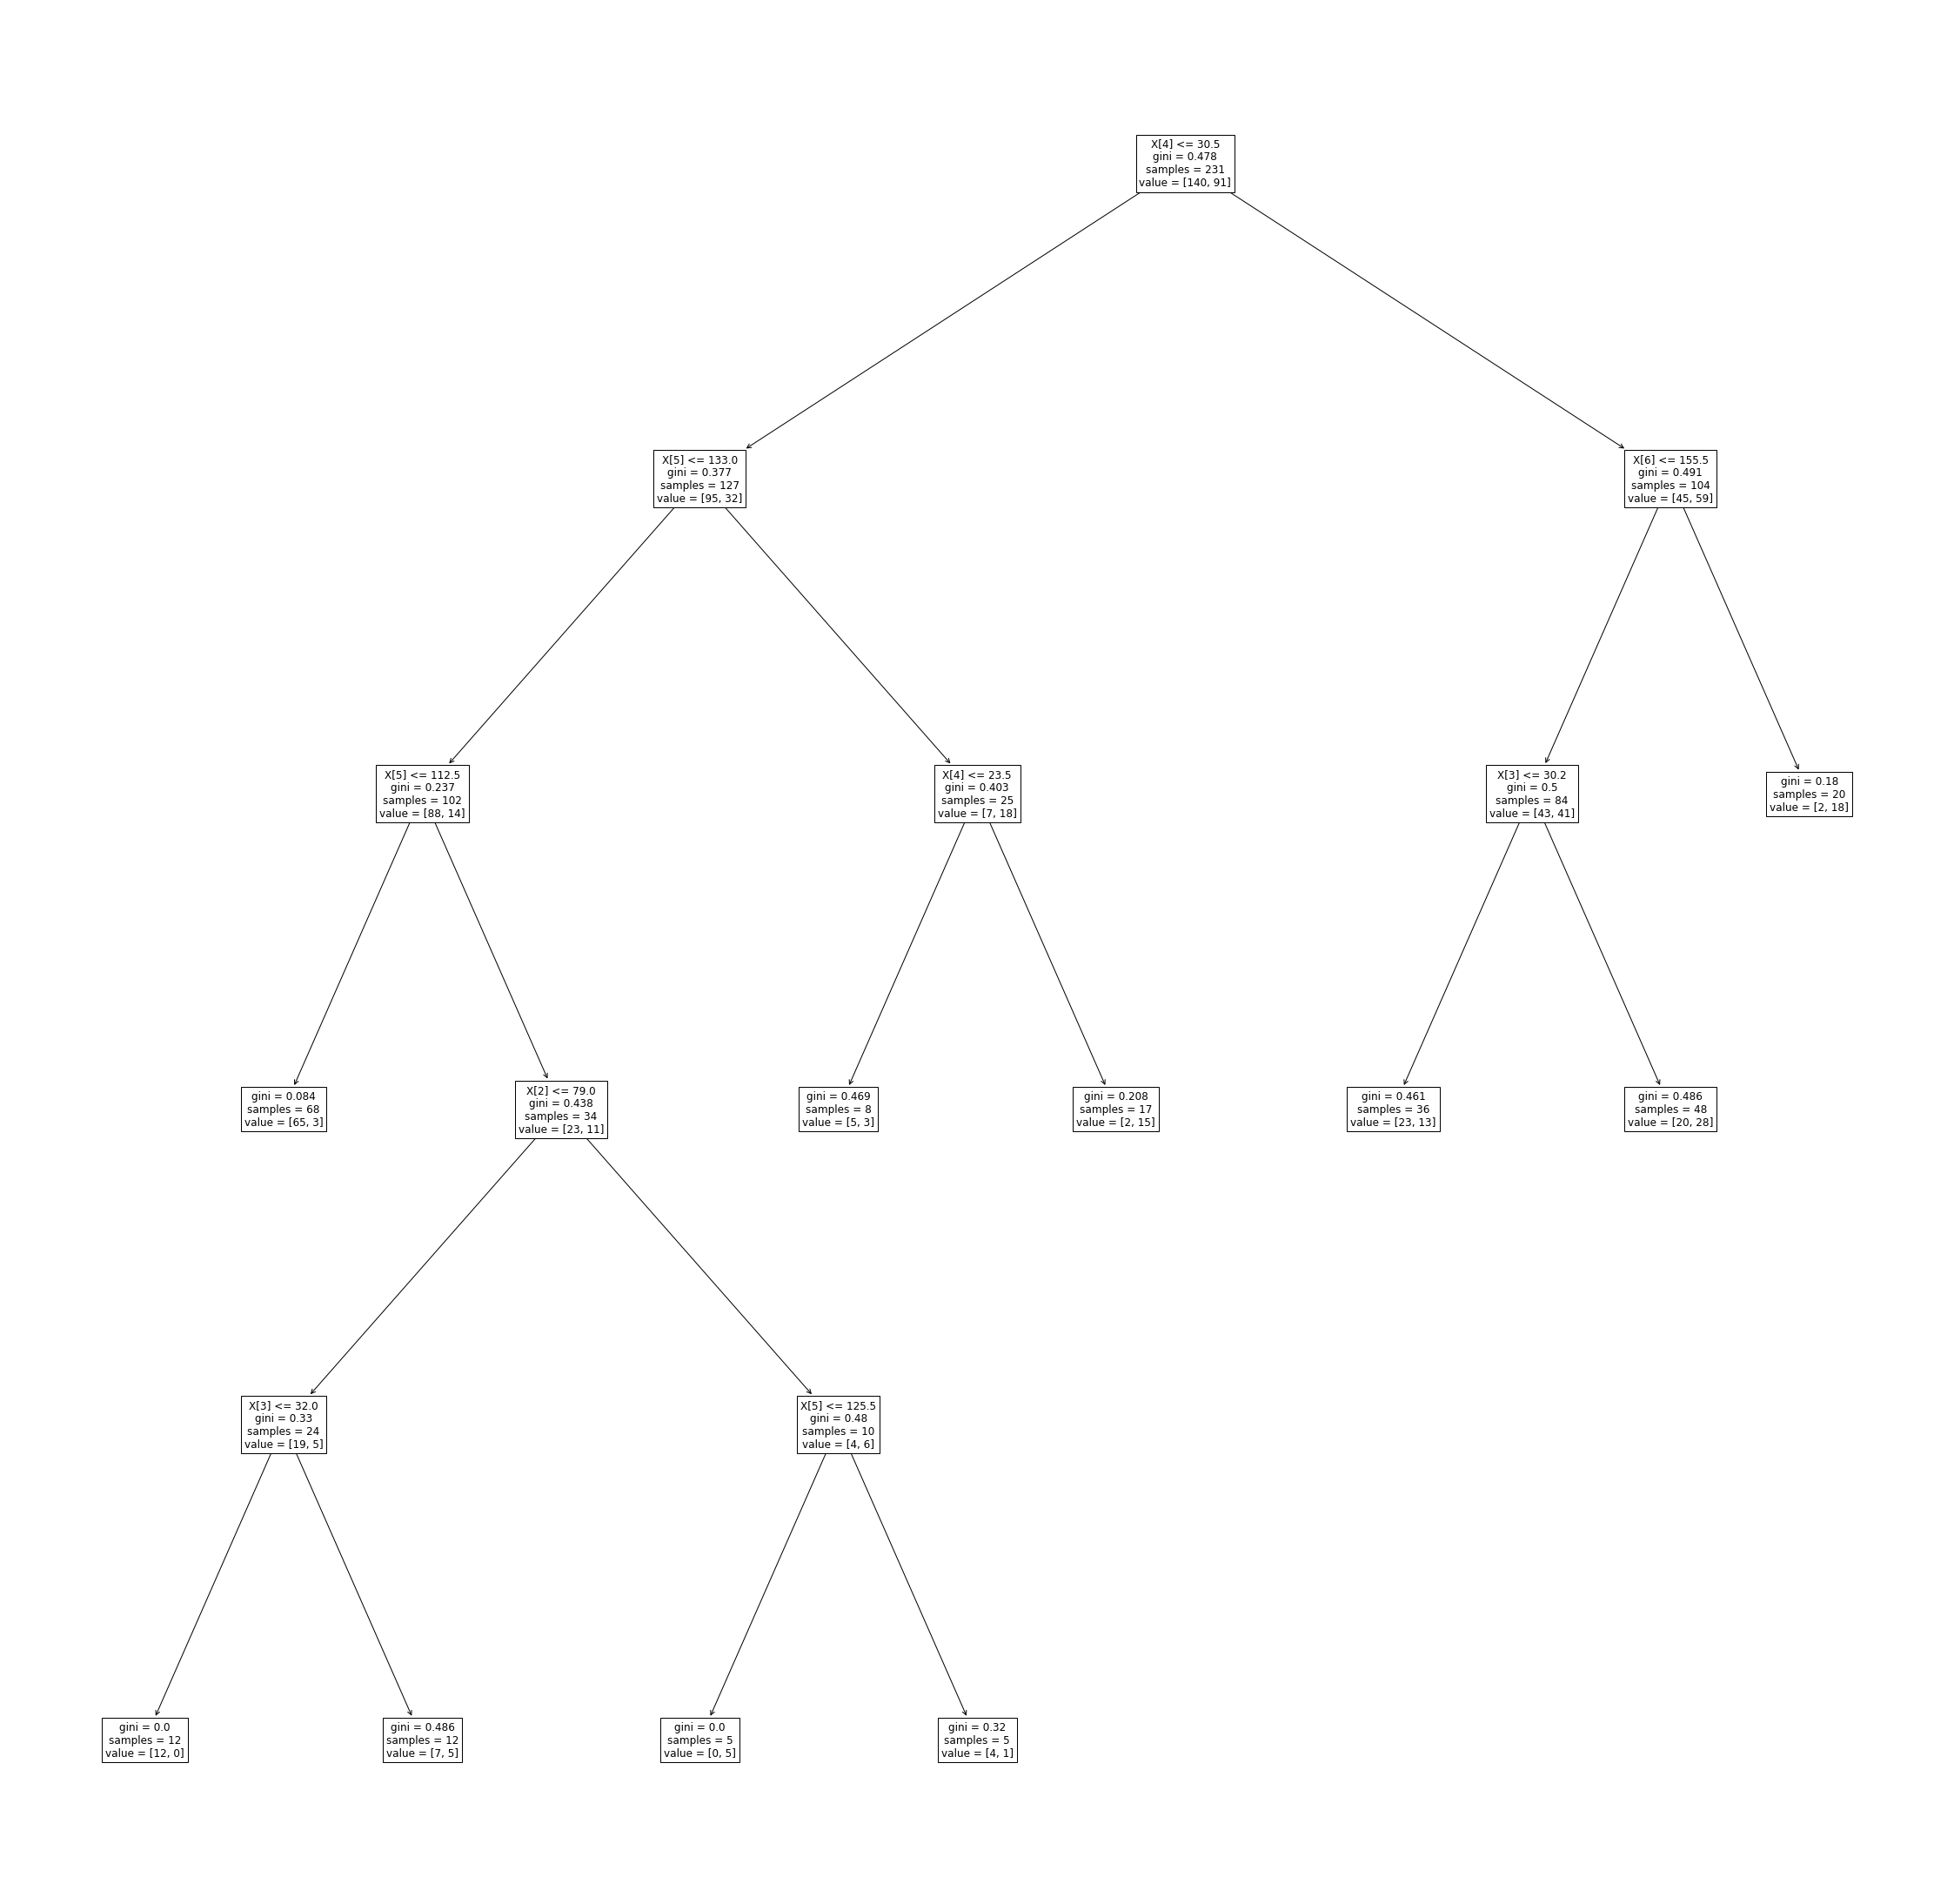

In [16]:
# Twój kod ...
import sklearn
from sklearn.ensemble import RandomForestClassifier

clf_random = RandomForestClassifier(max_depth=7, min_samples_split=10, min_samples_leaf=5, max_features=4, max_leaf_nodes=10, min_impurity_decrease=0.001, ccp_alpha=0.001)
clf_random.fit(X_train, y_train)
print_scores(clf, X_test, y_test)

plt.figure(figsize=(40,40))
tree.plot_tree(clf, fontsize=12)
plt.show()


# *7. Zadanie (1 pkt)

Znajdź na Kaggle zbiór danych, w których znajdują się zmienne kategoryczne. Czy drzewo decyzyjne w scikit-learn radzi sobie z takimi wartościami? Jeżeli nie, jak można obejść ten problem? Napisz odpowiednią funkcję.

In [17]:
def categorical_to_numerical(df):
  df_mod = pd.DataFrame()
  '''
    INPUT: Data frame of feature values. It may contain categorical variables.
    OUTPUT: Modified data frame with categorical variables encoded as numerical.
  '''
  # Twój kod
  return df_mod

#*8. Zadanie (1 pkt)

Znajdź na Kaggle lub w scikit-learn zbiór danych do regresji (np. House Prices prediction). Pobierz go i zbuduj drzewo regresyjne.

In [18]:
# Data Frame z danymi:
# Twój kod ...

# Drzewo regresyjne:
# Twój kod ...

# Maksymalna liczba punktów do uzyskania z laboratorium: 12/10 :)